<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/Walmart%20CI%20%26%20CLT%20Case%20Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aerofit**

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

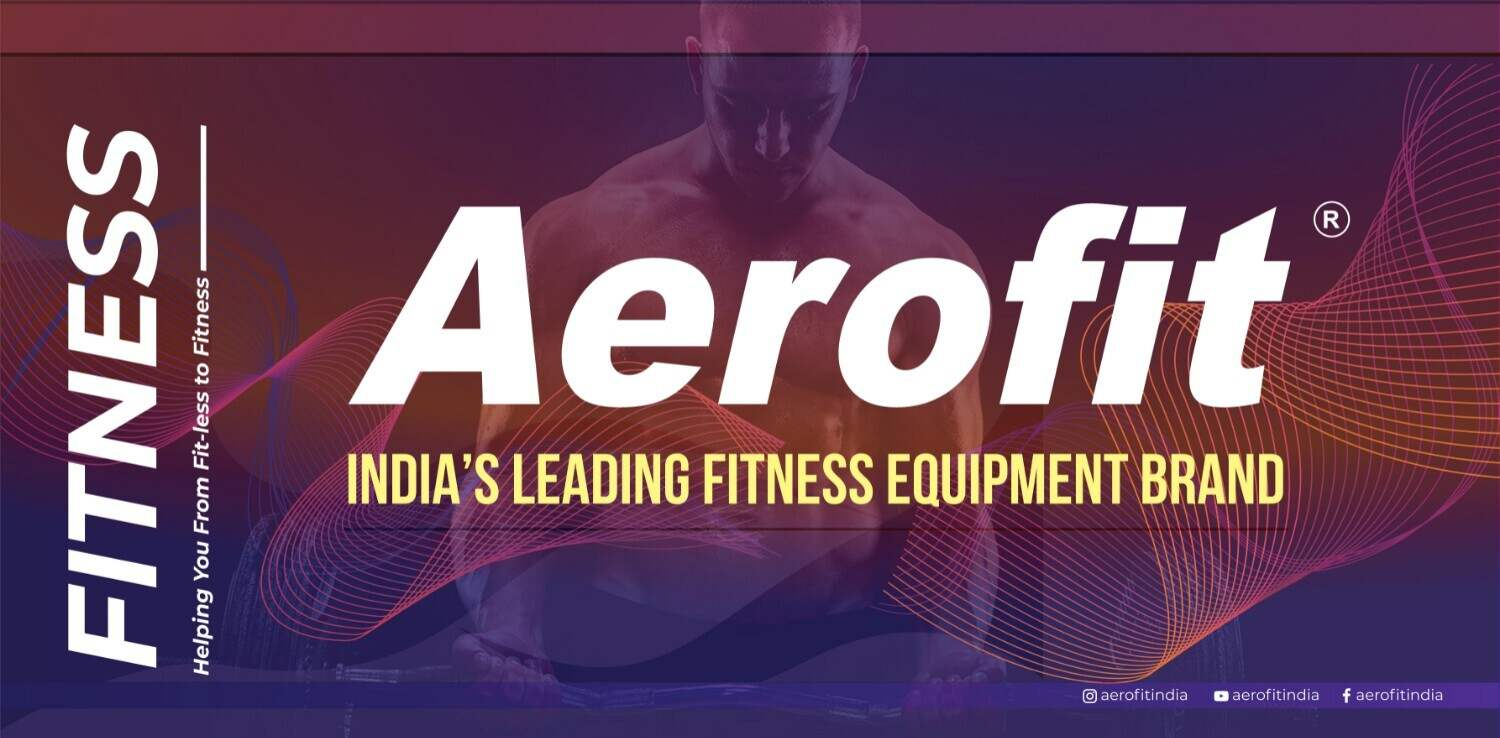

# **Business Problem**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

* Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
* For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business

# **Desired Outcome of Analysis**

* Customer Target profile  for each Product
* Feature Wise Propability for buying each product
* Correlation between Feature
* Bussiness Insights and Future Recommendations









# **Data Import and Basic Metric Analysis**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv")
dataC = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv")
# "dataC" - This will be used for changing some Numerical to Categorical,
# Whereas "data" will be used for Correlation, scatterplot & whereever indepth analysis required

In [ ]:
data.head()

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   KP281   18    Male         14        Single      3        4   29562    112
1   KP281   19    Male         15        Single      2        3   31836     75
2   KP281   19  Female         14     Partnered      4        3   30699     66
3   KP281   19    Male         12        Single      3        3   32973     85
4   KP281   20    Male         13     Partnered      4        2   35247     47

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [ ]:
data.index

RangeIndex(start=0, stop=180, step=1)

In [ ]:
data.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [ ]:
# Checking Value Count of Each Category
print("-------------------------------")
for i in data.columns:
  print(i, "Feature : nunique values ", data[i].nunique(),", Max :", data[i].max(),", Min :",data[i].min())

-------------------------------
Product Feature : nunique values  3 , Max : KP781 , Min : KP281
Age Feature : nunique values  32 , Max : 50 , Min : 18
Gender Feature : nunique values  2 , Max : Male , Min : Female
Education Feature : nunique values  8 , Max : 21 , Min : 12
MaritalStatus Feature : nunique values  2 , Max : Single , Min : Partnered
Usage Feature : nunique values  6 , Max : 7 , Min : 2
Fitness Feature : nunique values  5 , Max : 5 , Min : 1
Income Feature : nunique values  62 , Max : 104581 , Min : 29562
Miles Feature : nunique values  37 , Max : 360 , Min : 21


In [ ]:
data.describe()

Age   Education       Usage     Fitness         Income  \
count  180.000000  180.000000  180.000000  180.000000     180.000000   
mean    28.788889   15.572222    3.455556    3.311111   53719.577778   
std      6.943498    1.617055    1.084797    0.958869   16506.684226   
min     18.000000   12.000000    2.000000    1.000000   29562.000000   
25%     24.000000   14.000000    3.000000    3.000000   44058.750000   
50%     26.000000   16.000000    3.000000    3.000000   50596.500000   
75%     33.000000   16.000000    4.000000    4.000000   58668.000000   
max     50.000000   21.000000    7.000000    5.000000  104581.000000   

            Miles  
count  180.000000  
mean   103.194444  
std     51.863605  
min     21.000000  
25%     66.000000  
50%     94.000000  
75%    114.750000  
max    360.000000

In [ ]:
data.describe(include = object)

Product Gender MaritalStatus
count      180    180           180
unique       3      2             2
top      KP281   Male     Partnered
freq        80    104           107

* There are total 180 observations & 8 features in the data set
* There are no Null values
* There are 3 Categorical Feature & 5 Numerical Fetures
* Customer Age Range : 18 ~ 50 including both Male/Female & Married/Single
* Customer Education ranging from Upper Secondary(12) to Doctorates(22)
* Customer Income Range from 30000 to 105000$ Annually
* Customer Usage Ranges between 2 ~ 7 & miles between 21 ~ 360 miles in a week
* Aerofit has Customers of both Male/Female & Married/Single

# **Correlation among Data**

In [ ]:
data.corr()

<ipython-input-11-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


Age  Education     Usage   Fitness    Income     Miles
Age        1.000000   0.280496  0.015064  0.061105  0.513414  0.036618
Education  0.280496   1.000000  0.395155  0.410581  0.625827  0.307284
Usage      0.015064   0.395155  1.000000  0.668606  0.519537  0.759130
Fitness    0.061105   0.410581  0.668606  1.000000  0.535005  0.785702
Income     0.513414   0.625827  0.519537  0.535005  1.000000  0.543473
Miles      0.036618   0.307284  0.759130  0.785702  0.543473  1.000000

<ipython-input-12-48d00ee6b6e4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap = "Greens")


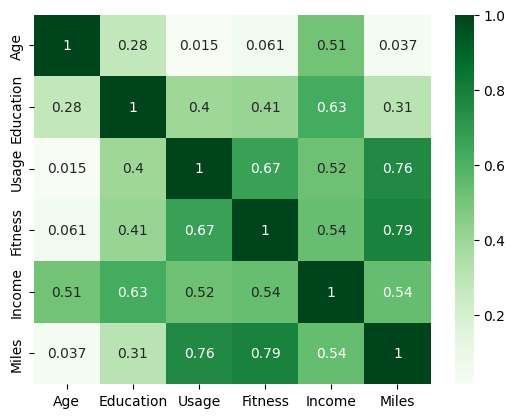

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap = "Greens")
plt.show()

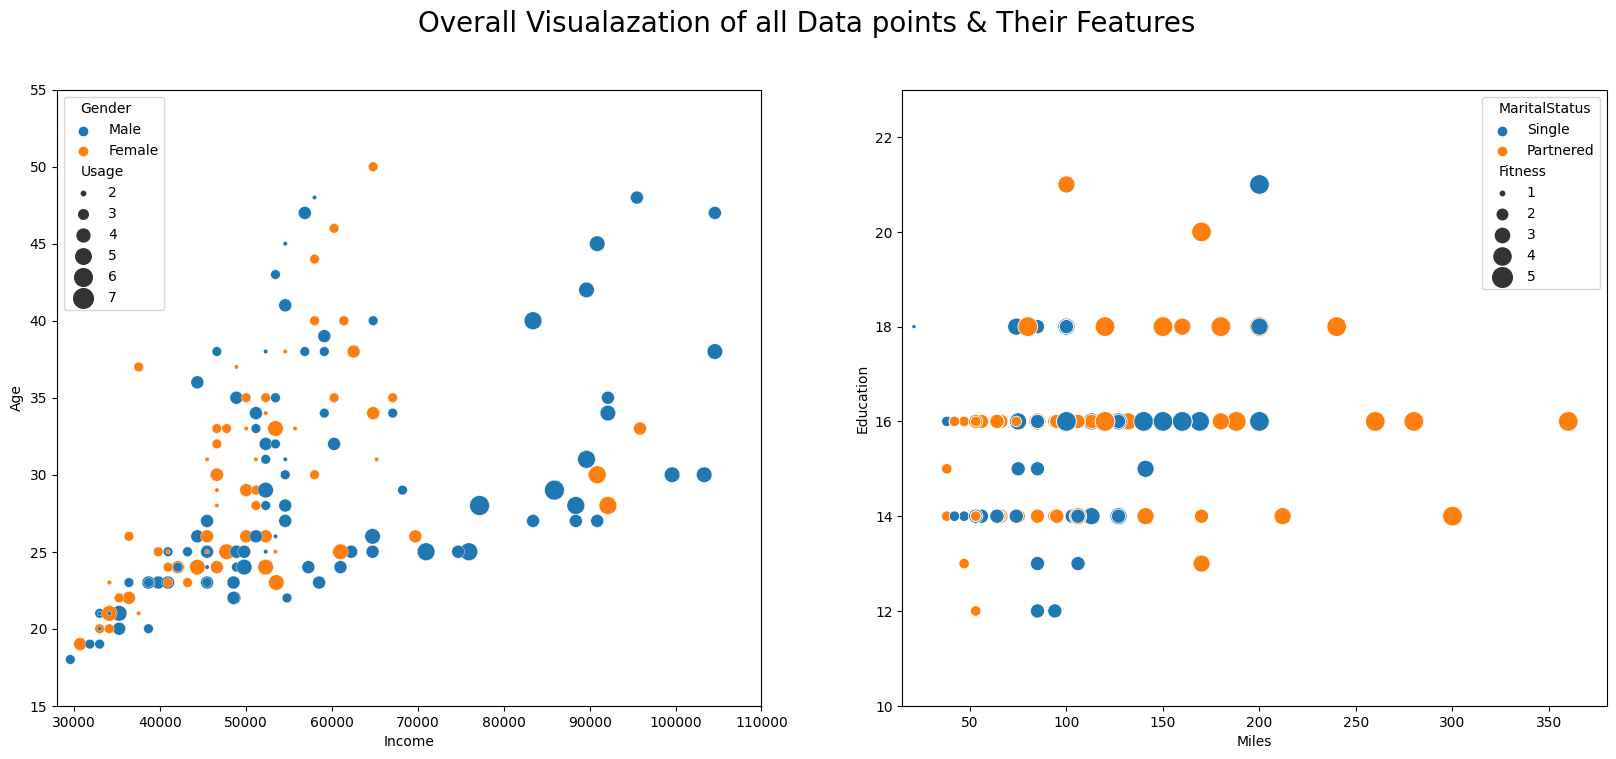

In [ ]:
plt.figure(figsize = (20,8))
plt.suptitle("Overall Visualazation of all Data points & Their Features",size = 20)
plt.subplot(1,2,1)
plt.xlim(28000,110000)
plt.ylim(15,55)
sns.scatterplot(data=data,y="Age",hue="Gender", x ="Income",size= "Usage",sizes = (10,200))
plt.subplot(1,2,2)
plt.xlim(15,380)
plt.ylim(10,23)
sns.scatterplot(data=data,x="Miles",size = "Fitness", y = "Education",hue = "MaritalStatus",sizes = (10,200))
plt.show()

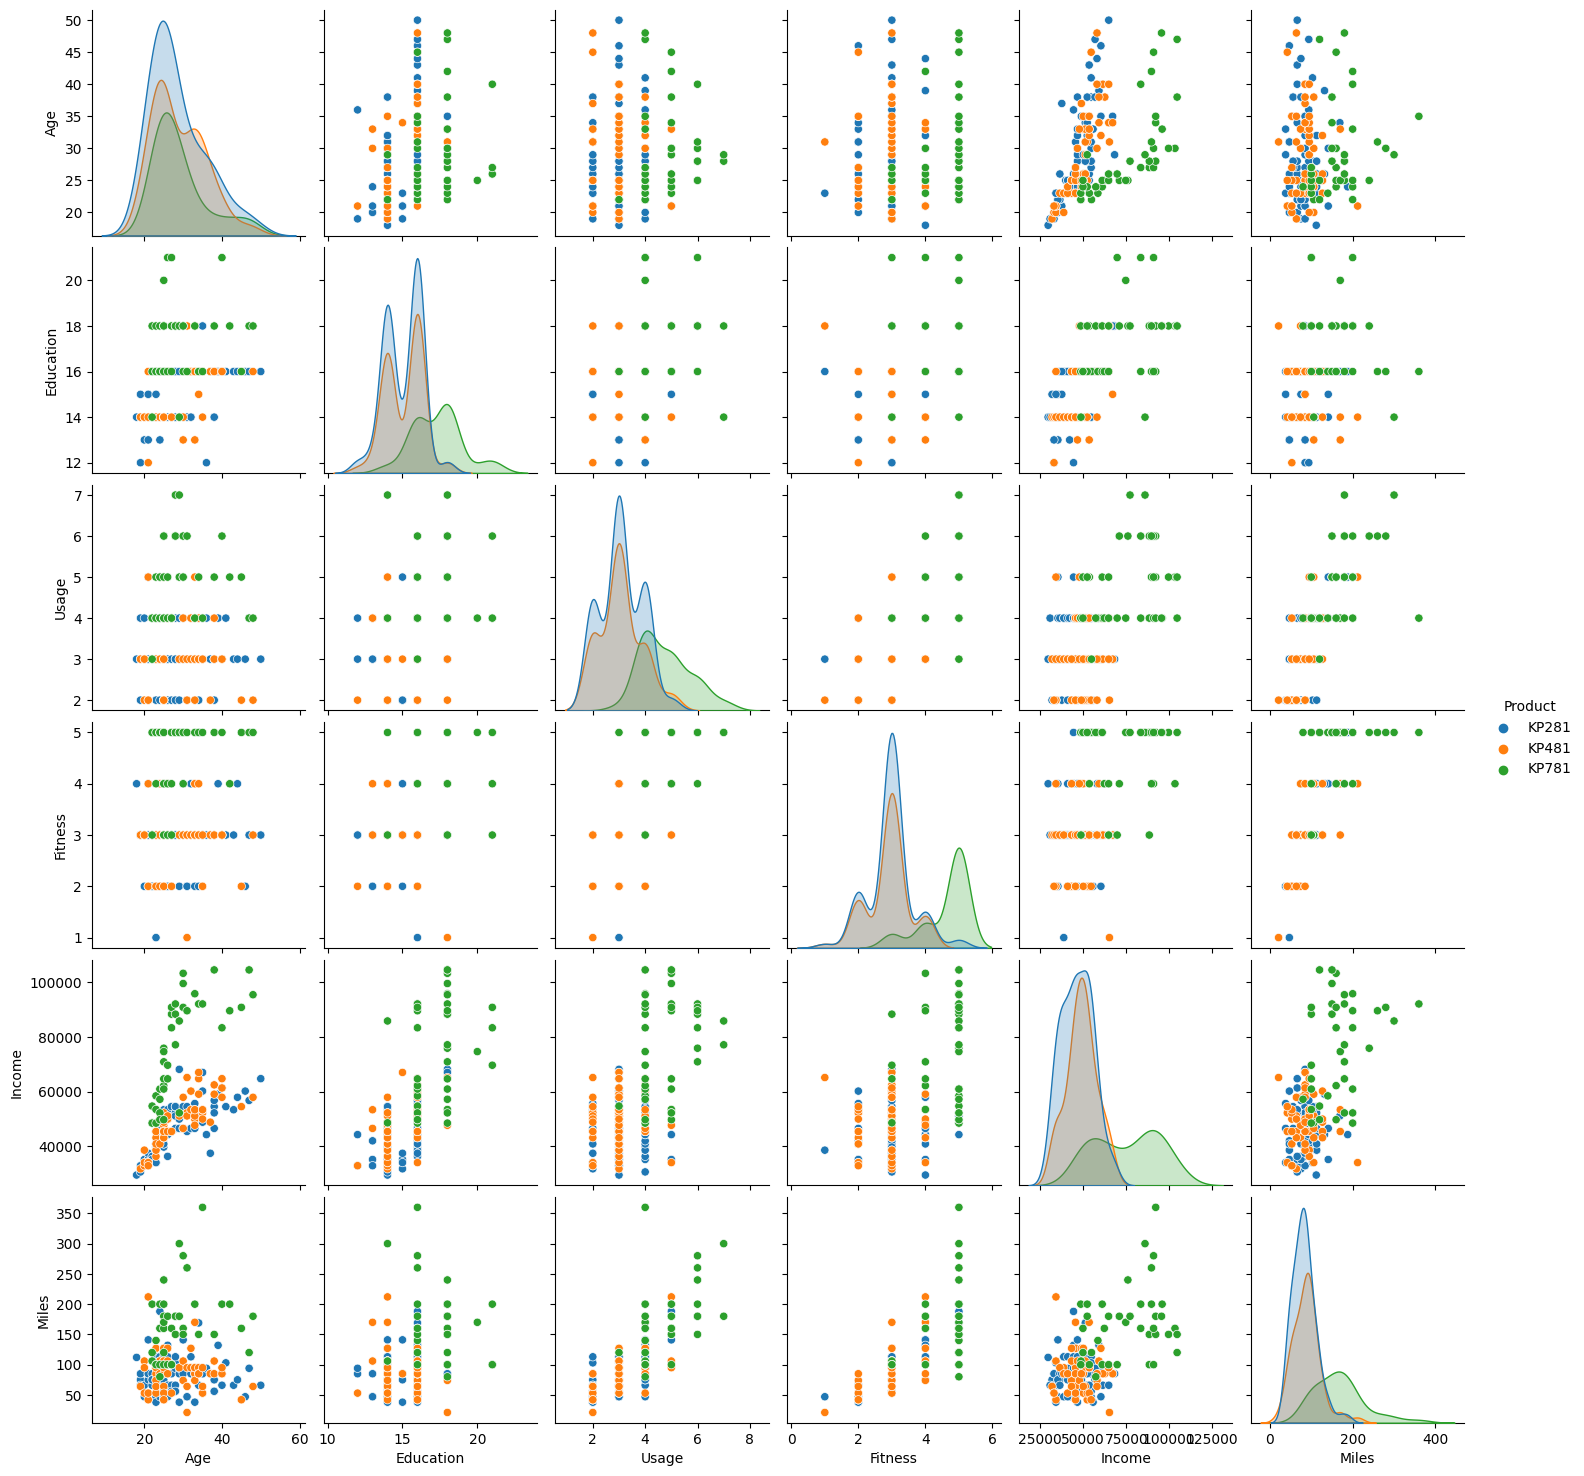

In [ ]:
sns.pairplot(data,hue="Product")


* All Features are Positively correlated
* Higher the Fitness Rating --> Higher the Usage also Higher Miles in a week
* Higher the Education --> Higher the Annual Income
* On an average people with higher income are having higher usage

# **Checking for Outliers**

<Axes: xlabel='Product', ylabel='Usage'>

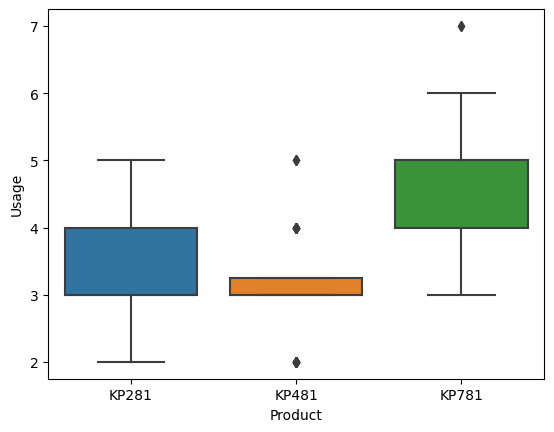

In [ ]:
sns.boxplot(data= data , y= "Usage", x ="Product")

<Axes: xlabel='Product', ylabel='Miles'>

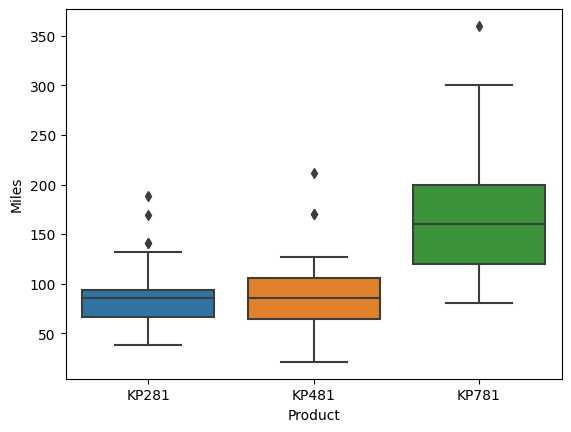

In [ ]:
sns.boxplot(data= data , y= "Miles", x ="Product")

<Axes: xlabel='Product', ylabel='Education'>

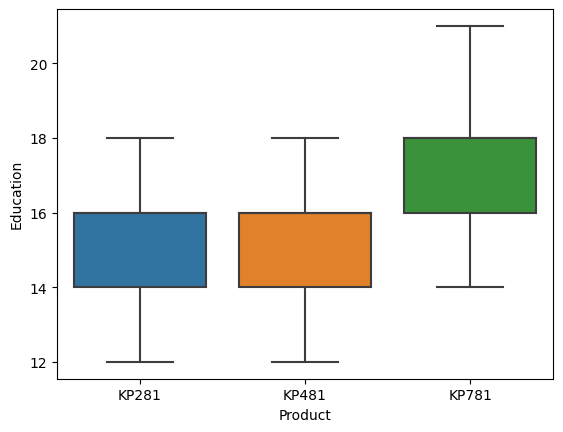

In [ ]:
sns.boxplot(data= data , y= "Education", x ="Product")

<Axes: xlabel='Product', ylabel='Income'>

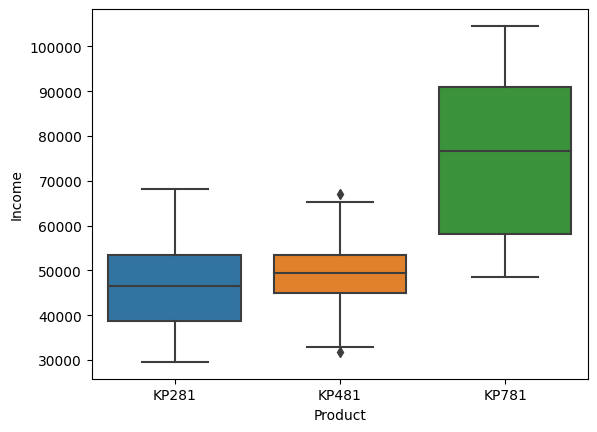

In [ ]:
sns.boxplot(data= data , y= "Income", x ="Product")

<Axes: xlabel='Product', ylabel='Age'>

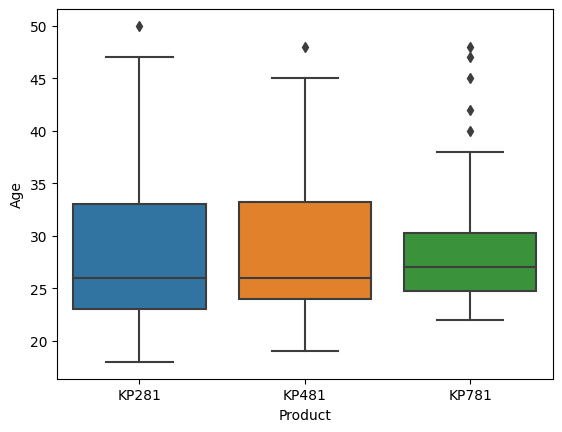

In [ ]:
sns.boxplot(data= data , y= "Age", x ="Product")

<Axes: xlabel='Product', ylabel='Fitness'>

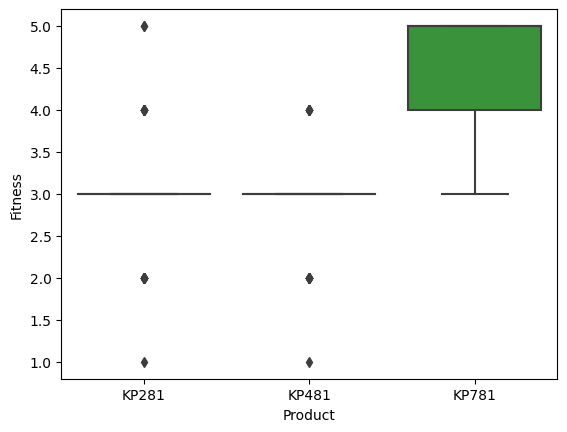

In [ ]:
sns.boxplot(data= data , y= "Fitness", x ="Product")

# **Finding IQR,Upperlimit & Lowerlimit for each product**

In [ ]:
datakp781=data[data["Product"] == "KP781"]
datakp481=data[data["Product"] == "KP481"]
datakp281=data[data["Product"] == "KP281"]

In [ ]:
# for KP281 Product
print("Feature : IQR, Lower_Limit, Quantile25, Quantile75, Upper_Limit")
droplist281=[]
for x in ("Education","Age","Income","Usage","Miles","Fitness"):
  IQR = np.percentile(datakp281[x],75)- np.percentile(datakp281[x],25)
  lower_limit = max (np.percentile(datakp281[x],25) - 1.5*IQR,0)
  upper_limit = np.percentile(datakp281[x],75) + 1.5*IQR
  droplist281.extend(list(np.where( (datakp281[x]>upper_limit) | (datakp281[x]<lower_limit) )[0]))
  print(x,":", IQR,lower_limit,np.percentile(datakp281[x],25),np.percentile(datakp281[x],75),upper_limit)
print("Outliers implicit indices for KP281:",droplist281)

Feature : IQR, Lower_Limit, Quantile25, Quantile75, Upper_Limit
Education : 2.0 11.0 14.0 16.0 19.0
Age : 10.0 8.0 23.0 33.0 48.0
Income : 14781.0 16486.5 38658.0 53439.0 75610.5
Usage : 1.0 1.5 3.0 4.0 5.5
Miles : 28.0 24.0 66.0 94.0 136.0
Fitness : 0.0 3.0 3.0 3.0 3.0
Outliers implicit indices for KP281: [79, 8, 23, 53, 61, 0, 4, 8, 11, 14, 19, 23, 25, 29, 31, 32, 34, 36, 39, 41, 51, 53, 55, 56, 57, 59, 61, 62, 72, 76, 77]


In [ ]:
# for KP481 Product
print("Feature : IQR, Lower_Limit,quantile25,quantile75 Upper_Limit")
droplist481=[]
for x in ("Education","Age","Income","Usage","Miles","Fitness"):
  IQR = np.percentile(datakp481[x],75)- np.percentile(datakp481[x],25)
  lower_limit = max (np.percentile(datakp481[x],25) - 1.5*IQR,0)
  upper_limit = np.percentile(datakp481[x],75) + 1.5*IQR
  droplist481.extend(list(np.where( (datakp481[x]>upper_limit) | (datakp481[x]<lower_limit) )[0]))
  print(x,":", IQR,lower_limit,np.percentile(datakp481[x],25),np.percentile(datakp481[x],75),upper_limit)
print("Outliers implicit indices for KP481:",droplist481)

Feature : IQR, Lower_Limit,quantile25,quantile75 Upper_Limit
Education : 2.0 11.0 14.0 16.0 19.0
Age : 9.25 10.125 24.0 33.25 47.125
Income : 8527.5 32120.25 44911.5 53439.0 66230.25
Usage : 0.25 2.625 3.0 3.25 3.625
Miles : 42.0 1.0 64.0 106.0 169.0
Fitness : 0.0 3.0 3.0 3.0 3.0
Outliers implicit indices for KP481: [59, 0, 47, 1, 4, 5, 6, 10, 17, 19, 20, 22, 23, 25, 26, 27, 28, 29, 30, 31, 34, 36, 37, 38, 40, 41, 43, 45, 52, 53, 58, 59, 4, 23, 40, 4, 5, 6, 11, 12, 14, 15, 18, 19, 24, 26, 29, 31, 37, 40, 44, 46, 48, 49, 50, 58]


In [ ]:
len(droplist281)

31

In [ ]:
# for KP781 Product
print("Feature : IQR, Lower_Limit,quantile25,quantile75 Upper_Limit")
droplist781=[]
for x in ("Education","Age","Income","Usage","Miles","Fitness"):
  IQR = np.percentile(datakp781[x],75)- np.percentile(datakp781[x],25)
  lower_limit = max (np.percentile(datakp781[x],25) - 1.5*IQR,0)
  upper_limit = np.percentile(datakp781[x],75) + 1.5*IQR
  droplist781.extend(list(np.where( (datakp781[x]>upper_limit) | (datakp781[x]<lower_limit) )[0]))
  print(x,":", IQR,lower_limit,np.percentile(datakp781[x],25),np.percentile(datakp781[x],75),upper_limit)
print("Outliers implicit indices for KP781:",droplist781)

Feature : IQR, Lower_Limit,quantile25,quantile75 Upper_Limit
Education : 2.0 13.0 16.0 18.0 21.0
Age : 5.5 16.5 24.75 30.25 38.5
Income : 32681.25 9182.875 58204.75 90886.0 139907.875
Usage : 1.0 2.5 4.0 5.0 6.5
Miles : 80.0 0.0 120.0 200.0 320.0
Fitness : 1.0 2.5 4.0 5.0 6.5
Outliers implicit indices for KP781: [35, 36, 37, 38, 39, 23, 26, 33]


* As per IQR analysis of all feature in each product
* There are
* 8 outlier in KP781
* 56 outlier in KP481
* 31 outlier in KP281







# **Data Statistical Analysis & Visualization for Each Product**

In [ ]:
datakp281.describe()

Age  Education      Usage   Fitness       Income       Miles
count  80.000000  80.000000  80.000000  80.00000     80.00000   80.000000
mean   28.550000  15.037500   3.087500   2.96250  46418.02500   82.787500
std     7.221452   1.216383   0.782624   0.66454   9075.78319   28.874102
min    18.000000  12.000000   2.000000   1.00000  29562.00000   38.000000
25%    23.000000  14.000000   3.000000   3.00000  38658.00000   66.000000
50%    26.000000  16.000000   3.000000   3.00000  46617.00000   85.000000
75%    33.000000  16.000000   4.000000   3.00000  53439.00000   94.000000
max    50.000000  18.000000   5.000000   5.00000  68220.00000  188.000000

In [ ]:
datakp281.describe(include=object)

Product Gender MaritalStatus
count       80     80            80
unique       1      2             2
top      KP281   Male     Partnered
freq        80     40            48

<Axes: xlabel='Miles', ylabel='Education'>

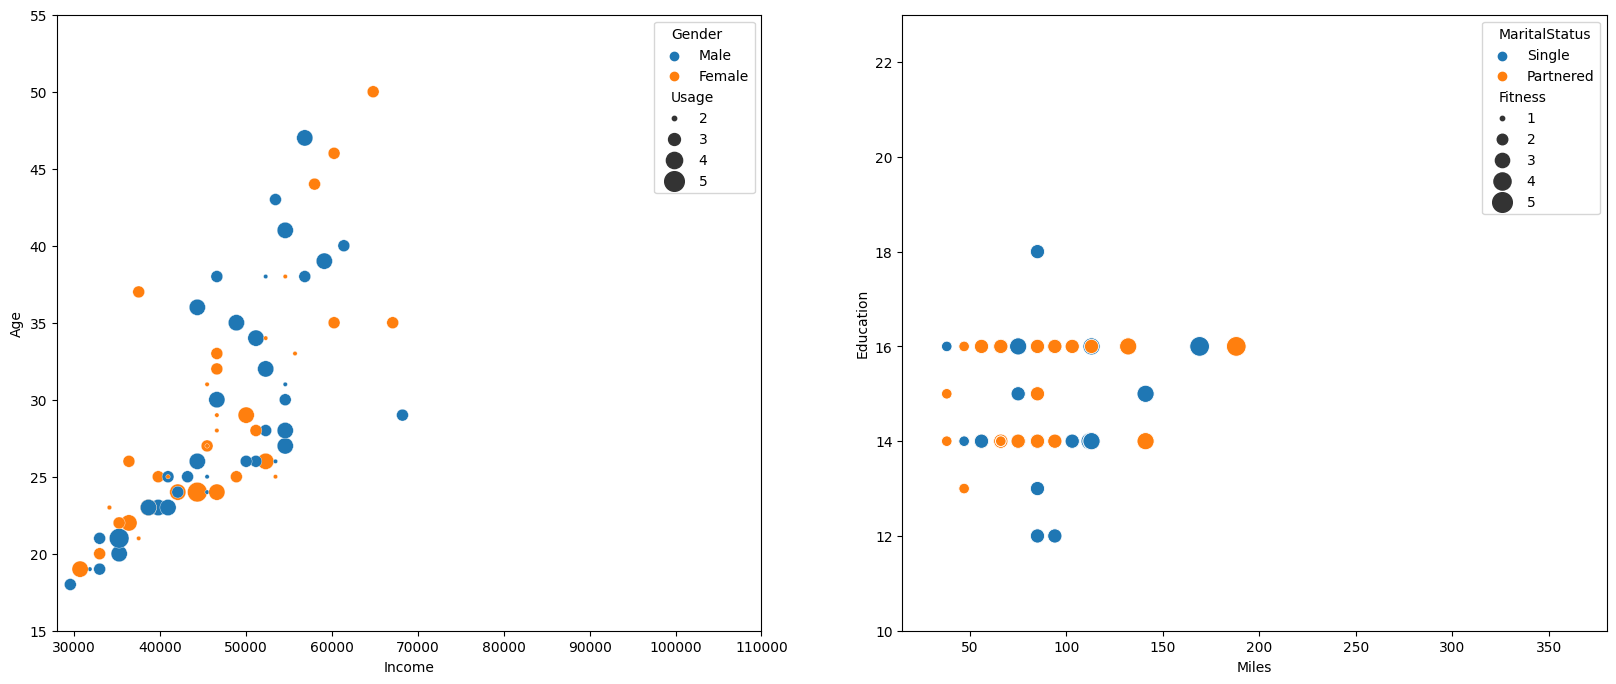

In [ ]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.xlim(28000,110000)
plt.ylim(15,55)
sns.scatterplot(data=datakp281,y="Age",hue="Gender", x ="Income",size= "Usage",sizes = (10,200))
plt.subplot(1,2,2)
plt.xlim(15,380)
plt.ylim(10,23)
sns.scatterplot(data=datakp281,x="Miles",size = "Fitness", y = "Education",hue = "MaritalStatus",sizes = (10,200))

* KP281 Customes having income less than 70000
* Majarity of kp281 Customer are in 20's and next in 30's, however KP281 product has customers in all ages
* Maximum miles in a week for KP281 customer is < 150 Miles
* Education Year of KP281 Customers < = 16 and major customer are of 16 & 14 year education
* Male & Female eqaully prefer KP281
* KP281 Customer ussage per week <=5
* KP281 Customer Rate their fitness <=3



In [ ]:
datakp481.describe()

Age  Education      Usage   Fitness        Income       Miles
count  60.000000  60.000000  60.000000  60.00000     60.000000   60.000000
mean   28.900000  15.116667   3.066667   2.90000  48973.650000   87.933333
std     6.645248   1.222552   0.799717   0.62977   8653.989388   33.263135
min    19.000000  12.000000   2.000000   1.00000  31836.000000   21.000000
25%    24.000000  14.000000   3.000000   3.00000  44911.500000   64.000000
50%    26.000000  16.000000   3.000000   3.00000  49459.500000   85.000000
75%    33.250000  16.000000   3.250000   3.00000  53439.000000  106.000000
max    48.000000  18.000000   5.000000   4.00000  67083.000000  212.000000

In [ ]:
datakp481.describe(include=object)

Product Gender MaritalStatus
count       60     60            60
unique       1      2             2
top      KP481   Male     Partnered
freq        60     31            36

<Axes: xlabel='Miles', ylabel='Education'>

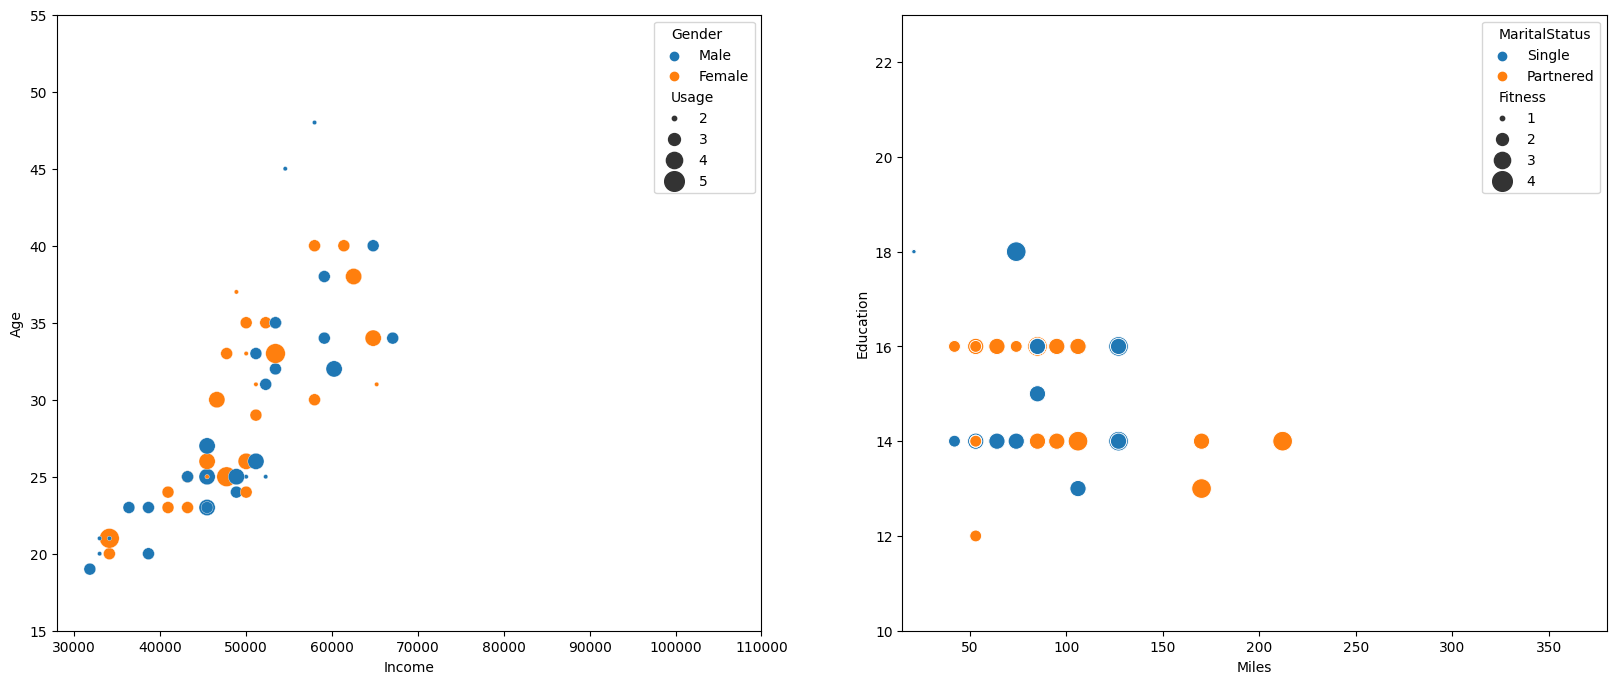

In [ ]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.xlim(28000,110000)
plt.ylim(15,55)
sns.scatterplot(data=datakp481,y="Age",hue="Gender", x ="Income",size= "Usage",sizes = (10,200))
plt.subplot(1,2,2)
plt.xlim(15,380)
plt.ylim(10,23)
sns.scatterplot(data=datakp481,x="Miles",size = "Fitness", y = "Education",hue = "MaritalStatus",sizes = (10,200))

* 33% Customers prefered KP481
* KP481 Customes having income less than 70000 ,however 75% of them lie between 45000 ~ 70000$
* KP481 customers have age < 40,Also Customer in 30~40 mostly prefered KP481
* Maximum miles in a week for KP481 customer is < 150 Miles, Hoever 60% customers mile/week lie in range 75 ~ 150
* Education Year of KP481 Customers < = 16 and major customer are of 16 & 14 year education
* Male slightly more prefered KP481 than females
* KP481 Customer ussage per week <=5
* KP481 Customer Rate their fitness <=4
* Marital Status has no impact on selection of Product



In [ ]:
datakp781.describe()

Age  Education      Usage    Fitness        Income       Miles
count  40.000000  40.000000  40.000000  40.000000      40.00000   40.000000
mean   29.100000  17.325000   4.775000   4.625000   75441.57500  166.900000
std     6.971738   1.639066   0.946993   0.667467   18505.83672   60.066544
min    22.000000  14.000000   3.000000   3.000000   48556.00000   80.000000
25%    24.750000  16.000000   4.000000   4.000000   58204.75000  120.000000
50%    27.000000  18.000000   5.000000   5.000000   76568.50000  160.000000
75%    30.250000  18.000000   5.000000   5.000000   90886.00000  200.000000
max    48.000000  21.000000   7.000000   5.000000  104581.00000  360.000000

In [ ]:
datakp781.describe(include=object)

Product Gender MaritalStatus
count       40     40            40
unique       1      2             2
top      KP781   Male     Partnered
freq        40     33            23

<Axes: xlabel='Miles', ylabel='Education'>

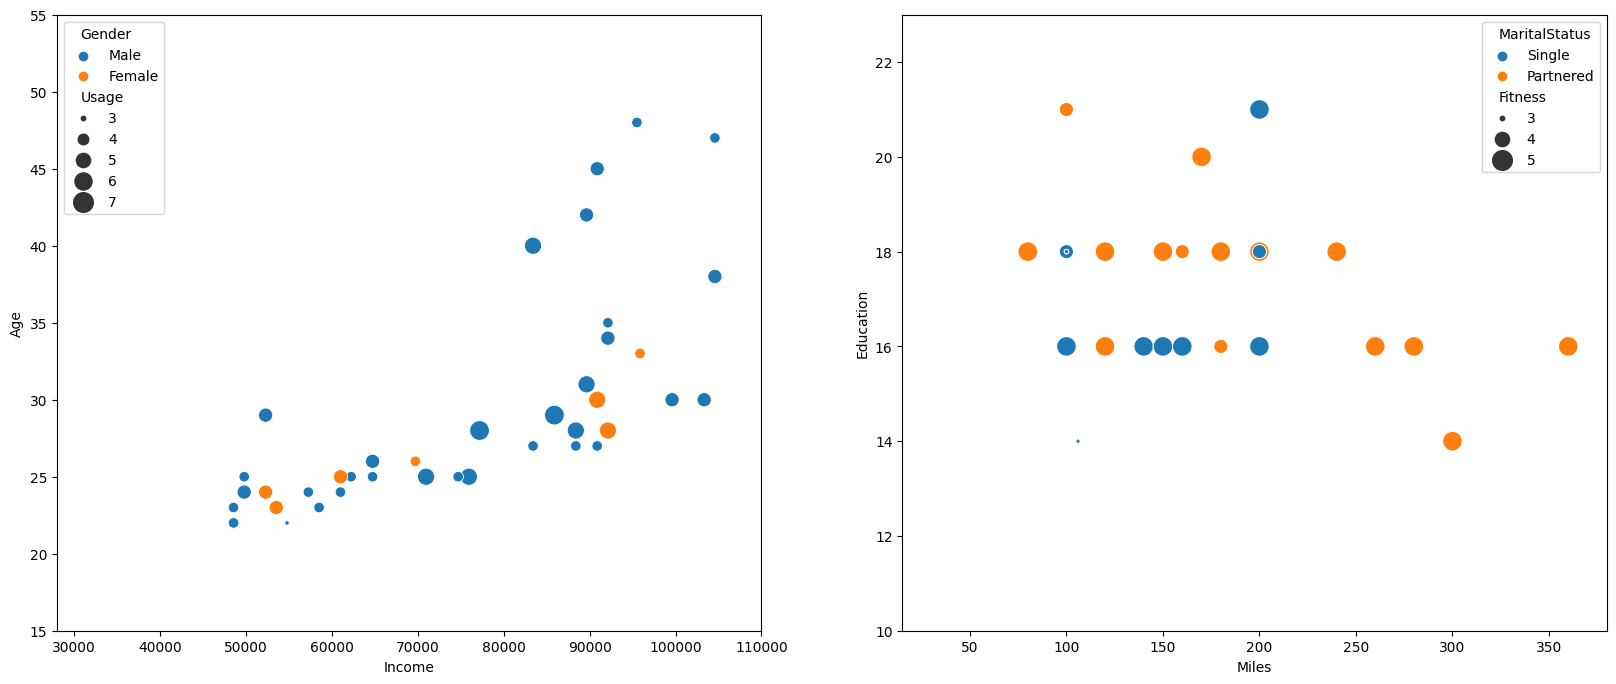

In [ ]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.xlim(28000,110000)
plt.ylim(15,55)
sns.scatterplot(data=datakp781,y="Age",hue="Gender", x ="Income",size= "Usage",sizes = (10,200))
plt.subplot(1,2,2)
plt.xlim(15,380)
plt.ylim(10,23)
sns.scatterplot(data=datakp781,x="Miles",size = "Fitness", y = "Education",hue = "MaritalStatus",sizes = (10,200))

* 22% Customers prefered KP781
* KP781 Customes having income >45000$  ,however 58% of them have income>150000$
* KP781 customers have age > 20, 75% Customer age is in range 20~30
* Miles in a week for KP781 customer is > 75 Miles, However 58% customers run > 150 miles
* Education Year of KP781 Customers >=14 and major customer are of 18 & then 16 year education
* Male[82%] highly prefered KP781 than females[18%]
* KP781 Customer ussage per week > =3 and 45% use it 4time , 30% use it for 5 times ans 18% use >=6 in a week
* KP781 Customer Rate their fitness >=3 and 72.5% customer rate themselves to be 5 rating fitness
* Marital Status has no impact on selection of Product



# **UniVariate, Bivariate Analysis & Converting Numerical to Categoricals**

**Product**

<Axes: xlabel='count', ylabel='Product'>

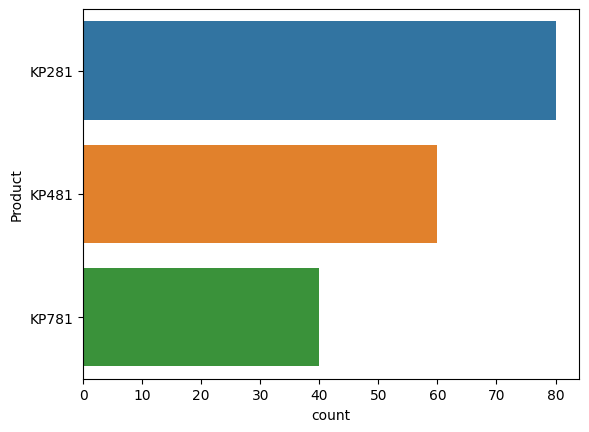

In [ ]:
sns.countplot(data=data, y = "Product")

* Most Sold Product is KP281


**Gender**

<function matplotlib.pyplot.show(close=None, block=None)>

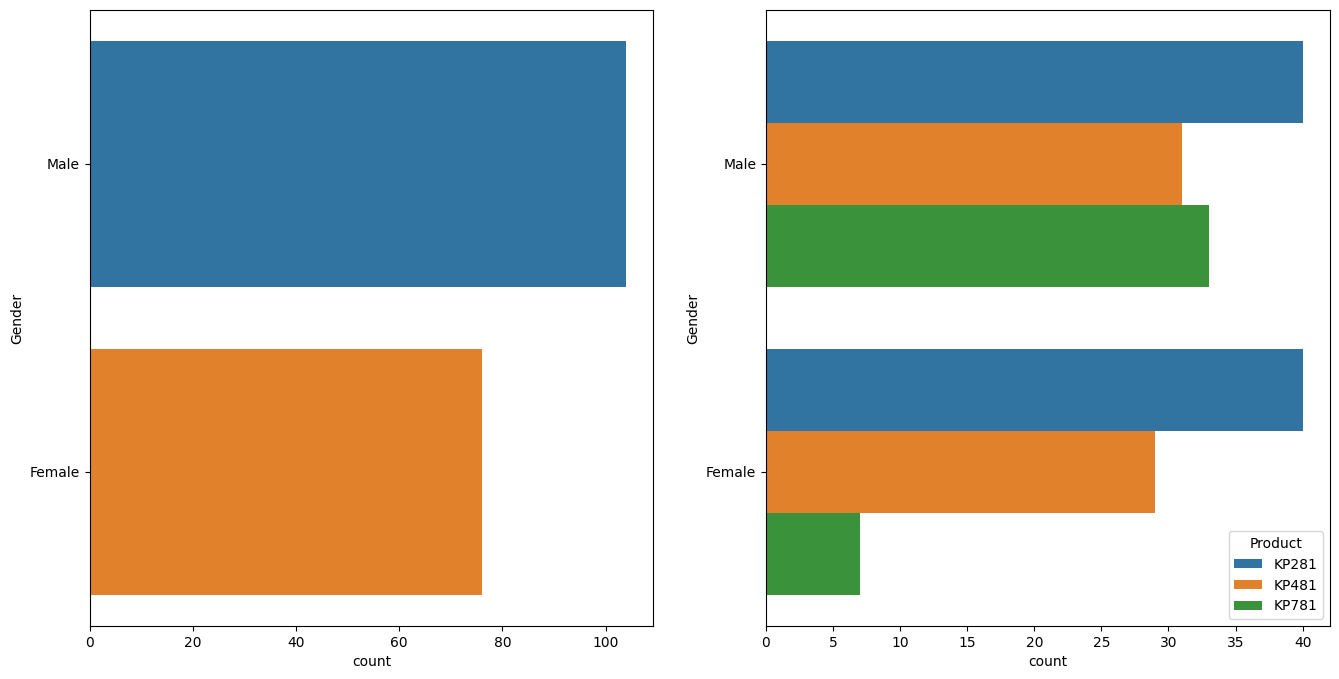

In [ ]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
sns.countplot(data=data,y="Gender")
plt.subplot(1,2,2)
sns.countplot(data=data,y="Gender",hue= "Product")
plt.show

* Male Buy More Product in Aerofit than Female Customers
* Male : Female Ratio of KP281,KP481 is almost same
* But in case of KP781, it is majorly preferred by Male Customers

**Education**

<function matplotlib.pyplot.show(close=None, block=None)>

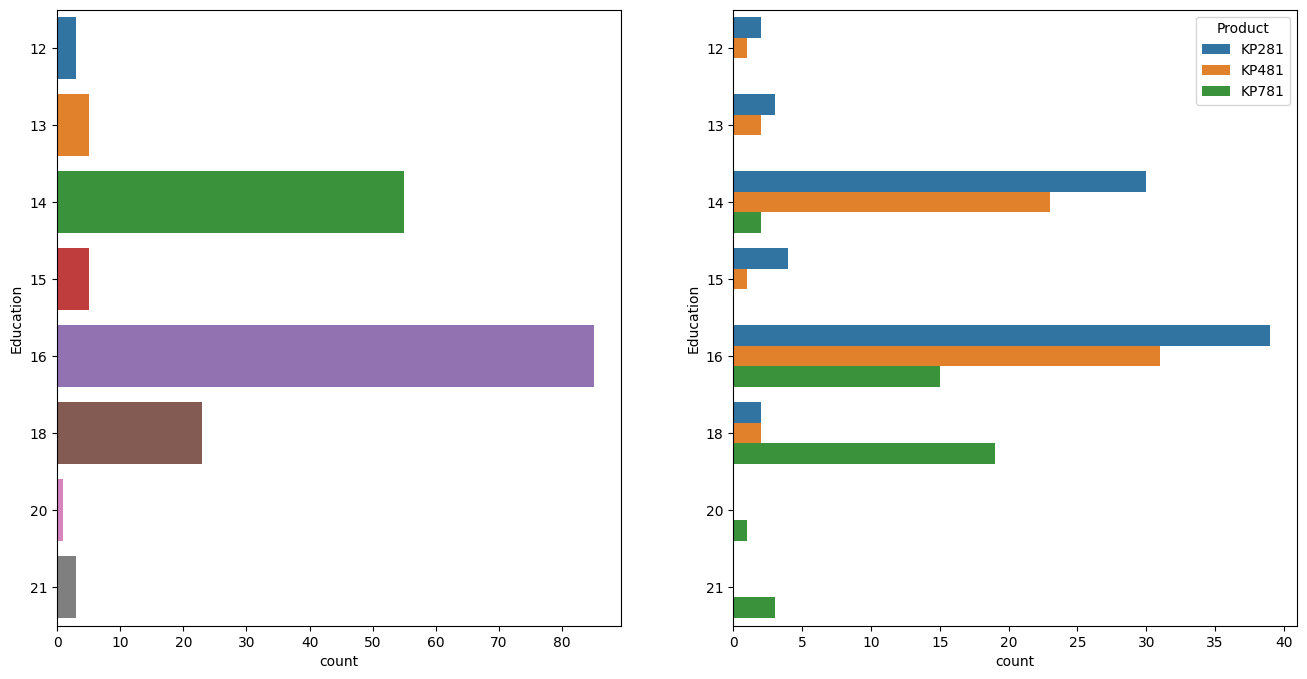

In [ ]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
sns.countplot(data=data,y="Education")
plt.subplot(1,2,2)
sns.countplot(data=data,y="Education",hue= "Product")
plt.show

In [ ]:
dataC["Education"] = pd.cut(data["Education"],bins=[10,12,14,16,18,22],labels=[1,2,3,4,5],right = True)

converting education in year into Categories
* 12  --> 1  (Highser Secondary)
* 13,14 --> 2 (Diploma)
* 15,16 --> 3 (Graduate)
* 18 --> 4 (Post Graduate)
* 20,21 --> 5 (Doctorates)

In [ ]:
#dataC["Education"] = pd.cut(data["Education"],bins=[10,12,14,16,18,22],labels=[Higher Secondary,Diploma,Graduate,Post Graduate,Doctorate],right = True)

<function matplotlib.pyplot.show(close=None, block=None)>

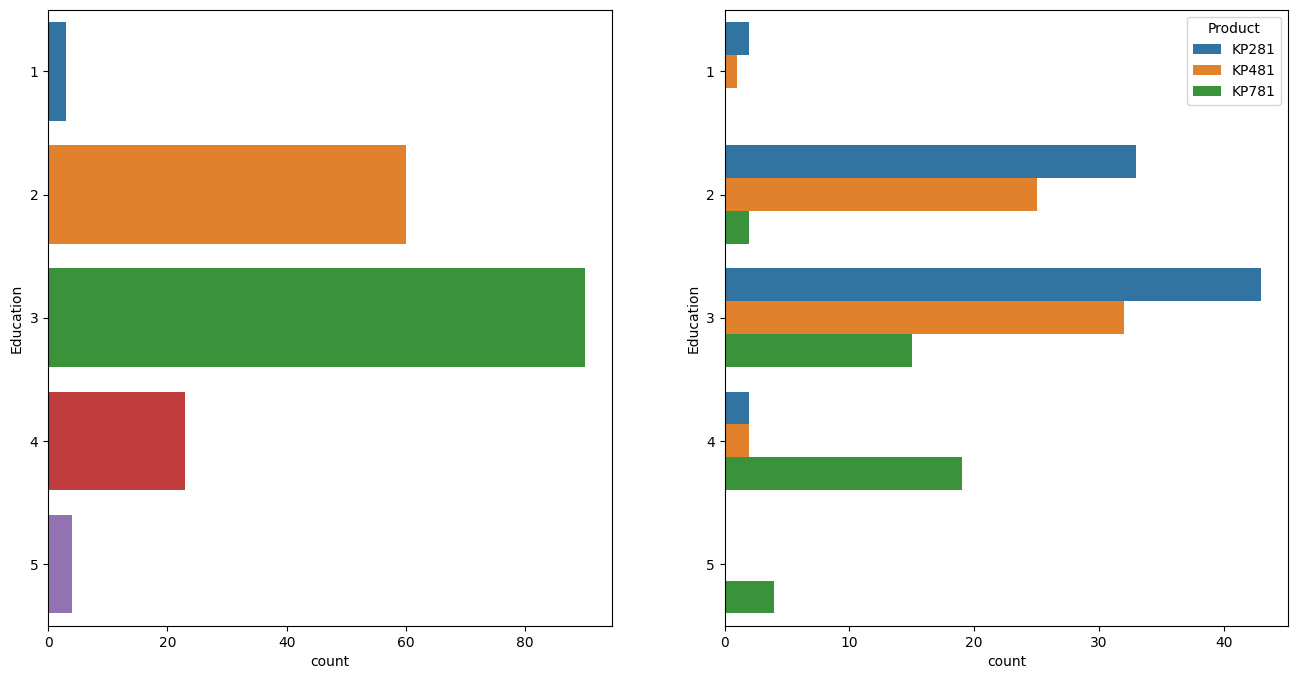

In [ ]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
sns.countplot(data=dataC,y="Education")
plt.subplot(1,2,2)
sns.countplot(data=dataC,y="Education",hue= "Product")
plt.show

* Customers with Education year [15,16] are the major qty customer
* KP281,KP481 are majorly preferred by customer with education year < 16
* KP781 is majorly prefered by customers with education year >= 16

**Age**

<Axes: xlabel='Age', ylabel='Count'>

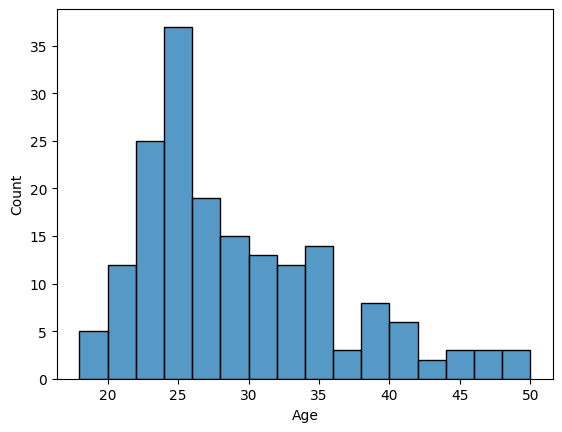

In [ ]:
sns.histplot(data["Age"], bins = 16)

Converting Age into Categories
* 18 ~ 20 --> Tens
* 21 ~ 30 --> Twenties
* 31 ~ 40 --> Thities
* 41 ~ 50 --> Fourties

In [ ]:
dataC["Age"] = pd.cut(data["Age"],bins=[10,20,30,40,50],labels=["Tens","Twenties","Thirties","Fourties"],right = True)

<Axes: xlabel='Age', ylabel='Density'>

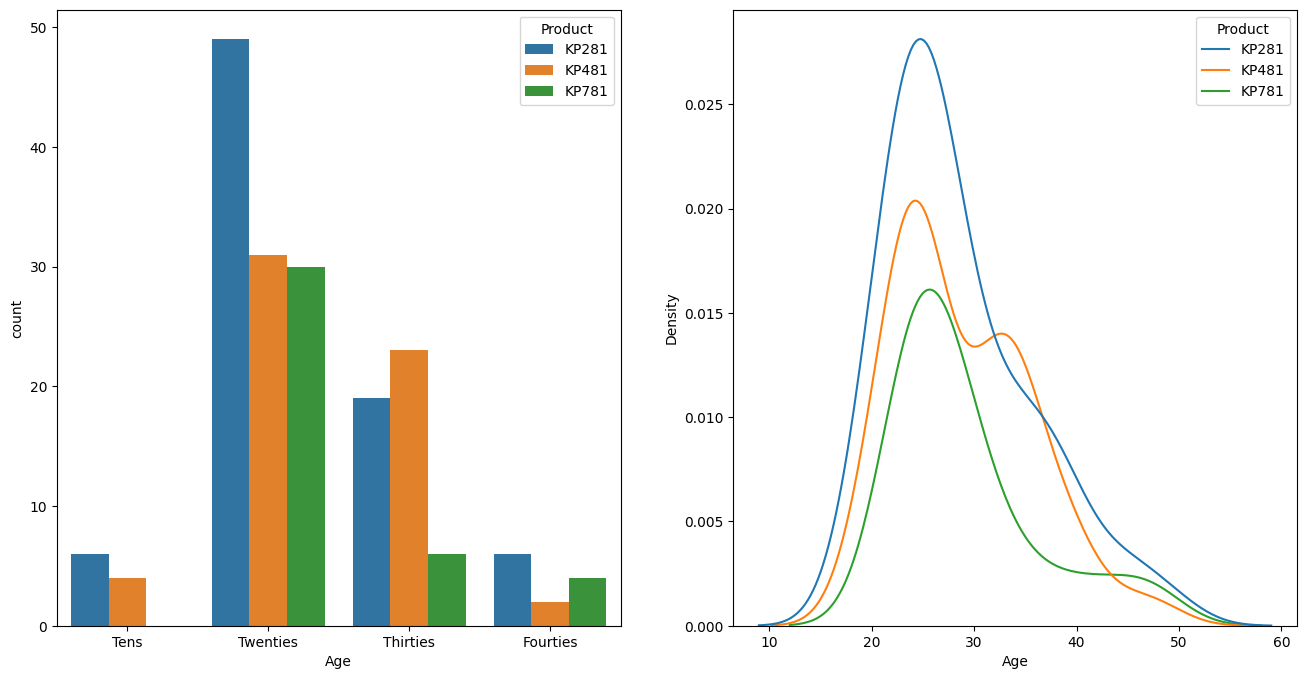

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(data=dataC, x="Age", hue = "Product")
plt.subplot(1,2,2)
sns.kdeplot(data= data, x=data["Age"],hue="Product")

* Twenties majorly prefers KP281
* KP481 is preferred by Twenties and however Customers in Thirties Majorly prefer it
* KP781 is majorly prefered by twenties

**Marital Status**

<function matplotlib.pyplot.show(close=None, block=None)>

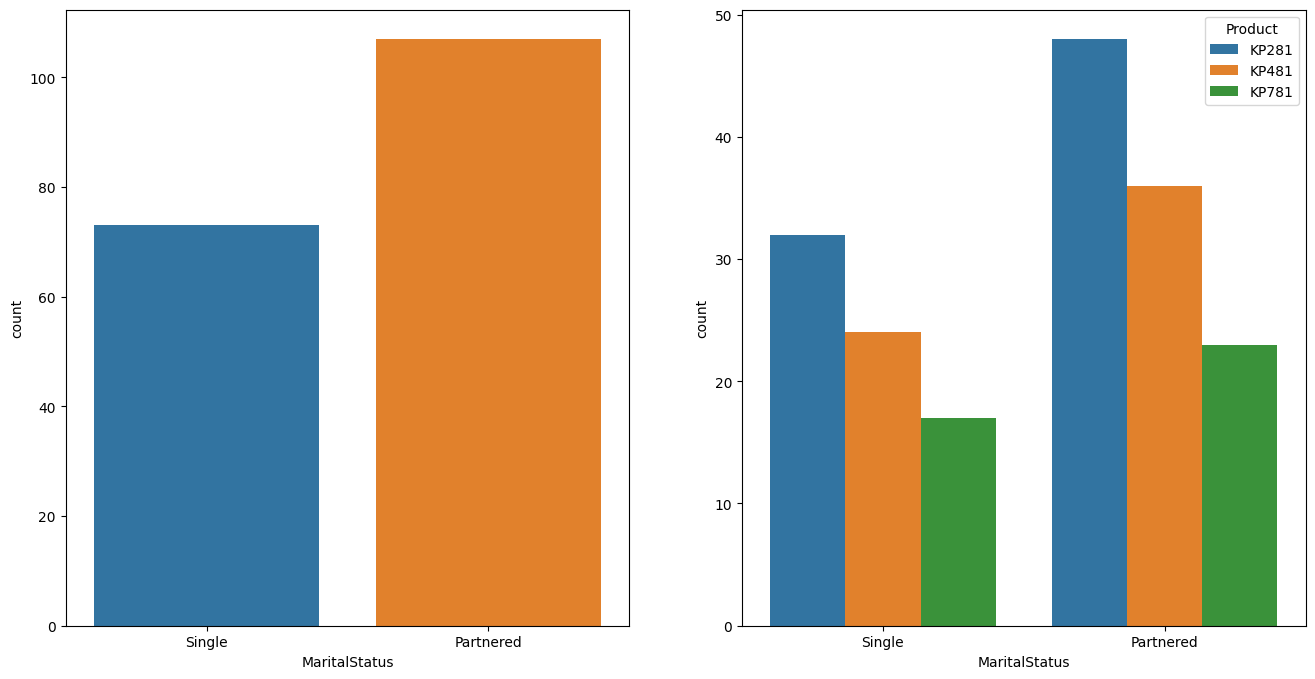

In [ ]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
sns.countplot(data=data, x="MaritalStatus")
plt.subplot(1,2,2)
sns.countplot(data=data, x="MaritalStatus",hue= "Product")
plt.show

* Parterned are the Major Customer Base
* However Product Selection has no impact of Marital Status

**Usage (No of Times used in a week)**

<function matplotlib.pyplot.show(close=None, block=None)>

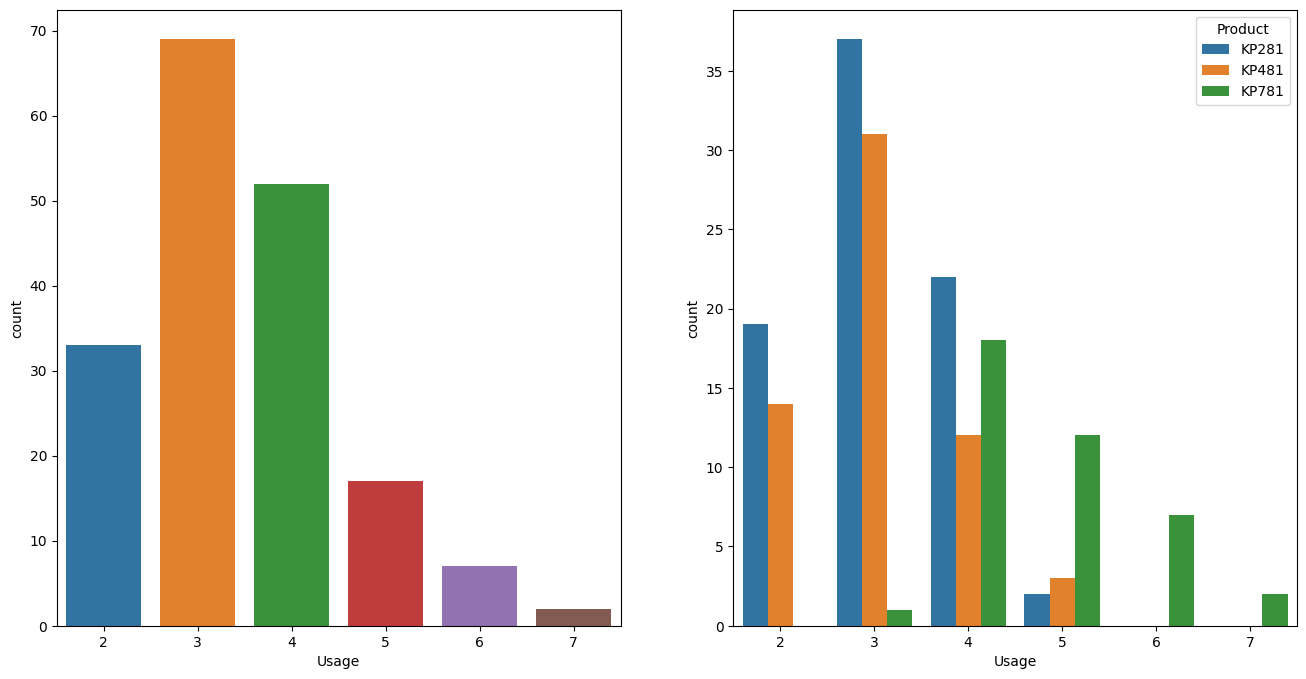

In [ ]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
sns.countplot(data=data, x="Usage")
plt.subplot(1,2,2)
sns.countplot(data=data, x="Usage",hue= "Product")
plt.show

* Customer with weekly usage <=3 prefer KP281 & KP481
* Customer with weekly usage >=5 prefer KP781

**Fitness**

<function matplotlib.pyplot.show(close=None, block=None)>

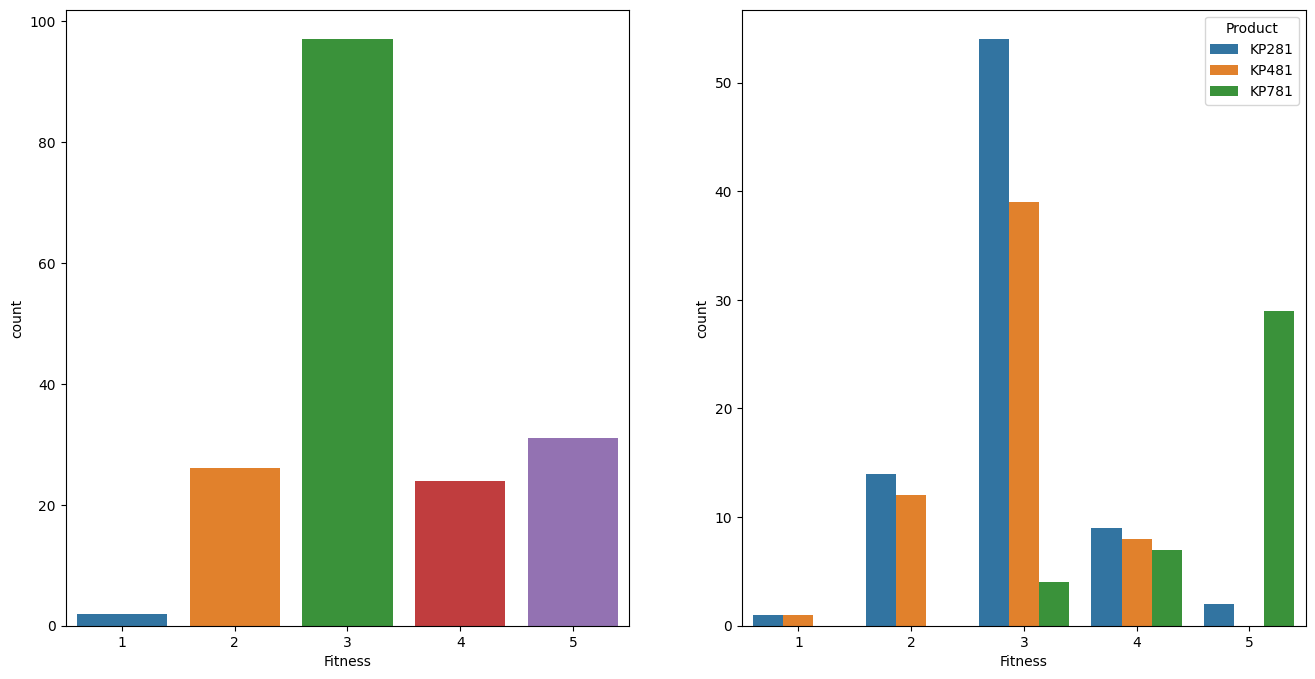

In [ ]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
sns.countplot(data=data, x="Fitness")
plt.subplot(1,2,2)
sns.countplot(data=data, x="Fitness",hue= "Product")
plt.show

* Majority of Customer rate theit fitness as "3"
* Customers rating themselves >=3 prefer KP281 & KP481
* Customers ratings themselves as "5" prefer to buy KP781

**Income**

<Axes: xlabel='Income', ylabel='Count'>

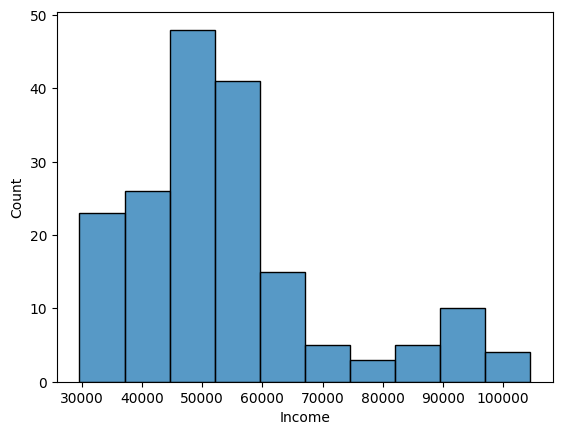

In [ ]:
sns.histplot(data= data ,x = data["Income"], bins = 10)

Converting Income into Catogories  base on the Histogram Plot
* 25000 ~ 45000 --> low
* 45000 ~ 70000 --> Medium
* 70000 ~ 90000 --> High
* 90000 ~ 110000 --> Very High

In [ ]:
dataC["Income"] = pd.cut(data["Income"],bins=[25000,45000,70000,90000,110000],labels=["Low","Medium","High","Very High"],right = True)

<Axes: xlabel='Income', ylabel='Density'>

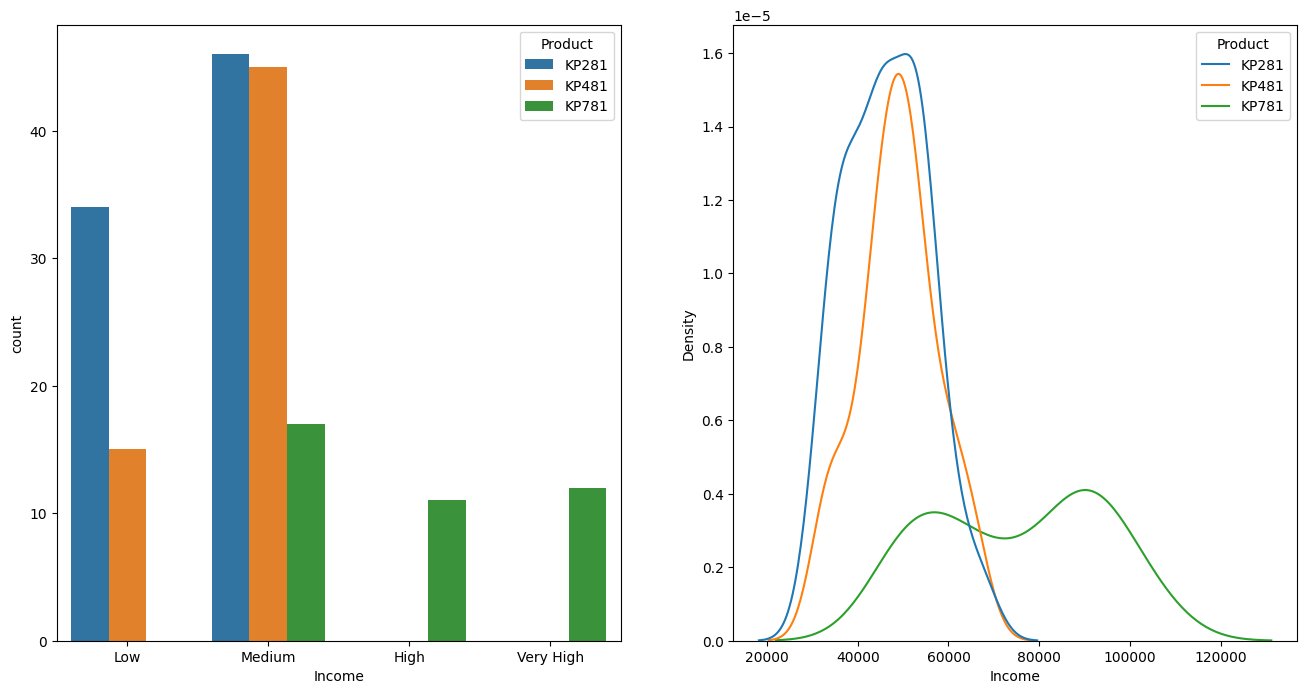

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(data=dataC,x="Income",hue="Product")
plt.subplot(1,2,2)
sns.kdeplot(data=data,x="Income",hue="Product")

* Customers with income > 75000 prefer to buy KP781
* Customers with Income [45000,70000] equally prefer KP281,KP481
* Customer with income < 45000 prefer KP281

<Axes: xlabel='Miles', ylabel='Count'>

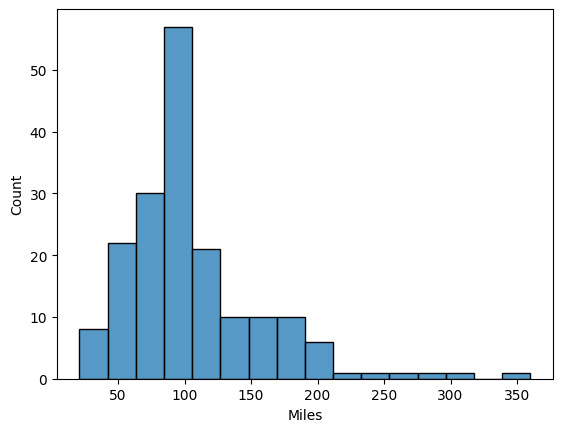

In [ ]:
sns.histplot(data["Miles"], bins = 16)

Converting Miles into Catogories base on the Histogram Plot
* 0 ~ 75 --> low
* 75 ~ 150 --> Medium
* 150 ~ 225 --> High
* 225 ~ 375 --> Very High

In [ ]:
dataC["Miles"] = pd.cut(data["Miles"],bins=[0,75,150,225,375],labels=["low","Medium","High","Very High"],right = True)

<Axes: xlabel='Miles', ylabel='Density'>

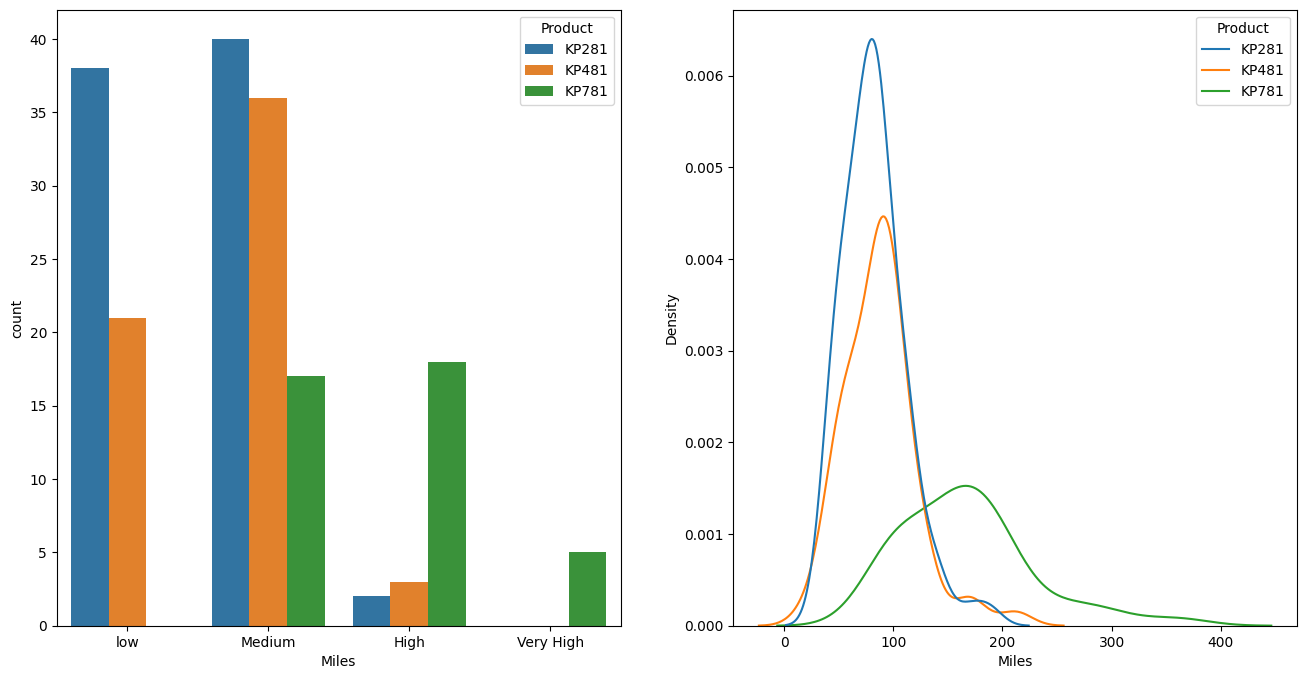

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(data=dataC,x="Miles",hue="Product")
plt.subplot(1,2,2)
sns.kdeplot(data=data,x="Miles",hue="Product")

* Customers with Miles > 225 prefer to buy KP781
* Customers with Miles [75,150]  equally prefers KP281, KP481 & next prefers KP781
* Customers with Miles < 75 highly prefers KP281 and next KP481 but never KP781

In [ ]:
dataC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    object  
 1   Age            180 non-null    category
 2   Gender         180 non-null    object  
 3   Education      180 non-null    category
 4   MaritalStatus  180 non-null    object  
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    category
 8   Miles          180 non-null    category
dtypes: category(4), int64(2), object(3)
memory usage: 8.7+ KB


In [ ]:
print ("Category : Nunique , Max , Min")
print("-------------------------------")
for i in dataC.columns:
  print(i, ":", dataC[i].nunique(),",", dataC[i].max(),",",dataC[i].min())

Category : Nunique , Max , Min
-------------------------------
Product : 3 , KP781 , KP281
Age : 4 , Fourties , Tens
Gender : 2 , Male , Female
Education : 5 , 5 , 1
MaritalStatus : 2 , Single , Partnered
Usage : 6 , 7 , 2
Fitness : 5 , 5 , 1
Income : 4 , Very High , Low
Miles : 4 , Very High , low


# **Calculating Marginal & Conditional Propabilities with 2 way Contigency table**

In [ ]:
data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

****Calculating all Marginal & Conditional propobilities with Heatmaps ****

*************************************************
Unique Value Counts of Product Feature
*************************************************
KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64
*************************************************
Marginal Propabilities of each value in Product Feature
*************************************************
P( KP281 ) = 0.44
P( KP481 ) = 0.33
P( KP781 ) = 0.22
*************************************************

----------------------------------------------------------------------------------------------------------
Unique Value Counts of Age Feature
*************************************************
Twenties    110
Thirties     48
Fourties     12
Tens         10
Name: Age, dtype: int64
*************************************************
Marginal Propabilities of each value in Age Feature
*************************************************
P( Twenties ) = 0.61
P( Thi

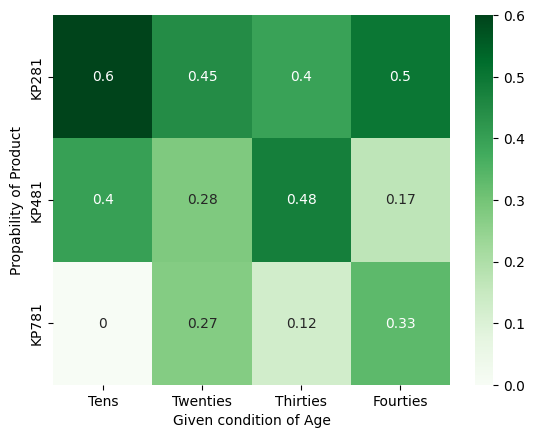


----------------------------------------------------------------------------------------------------------
Unique Value Counts of Gender Feature
*************************************************
Male      104
Female     76
Name: Gender, dtype: int64
*************************************************
Marginal Propabilities of each value in Gender Feature
*************************************************
P( Male ) = 0.58
P( Female ) = 0.42
*************************************************
2-Way Contigency Table for Features : Product & Gender
*************************************************
Gender   Female  Male  All
Product                   
KP281        40    40   80
KP481        29    31   60
KP781         7    33   40
All          76   104  180
*************************************************
Index Wise Nornmalized 2-Way Contigency Table for Features : Product & Gender
*************************************************
Gender     Female      Male
Product                    
KP281  

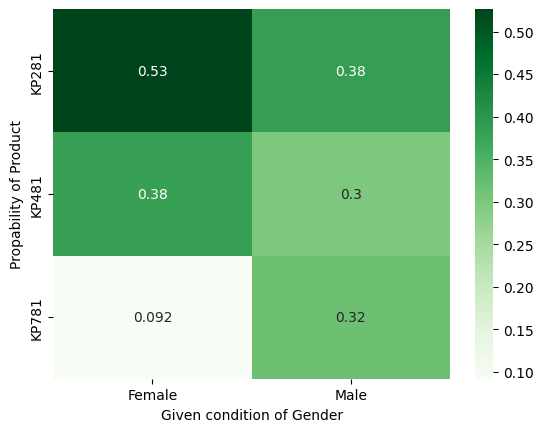


----------------------------------------------------------------------------------------------------------
Unique Value Counts of Education Feature
*************************************************
3    90
2    60
4    23
5     4
1     3
Name: Education, dtype: int64
*************************************************
Marginal Propabilities of each value in Education Feature
*************************************************
P( 3 ) = 0.5
P( 2 ) = 0.33
P( 4 ) = 0.13
P( 5 ) = 0.02
P( 1 ) = 0.02
*************************************************
2-Way Contigency Table for Features : Product & Education
*************************************************
Education  1   2   3   4  5  All
Product                         
KP281      2  33  43   2  0   80
KP481      1  25  32   2  0   60
KP781      0   2  15  19  4   40
All        3  60  90  23  4  180
*************************************************
Index Wise Nornmalized 2-Way Contigency Table for Features : Product & Education
*****************

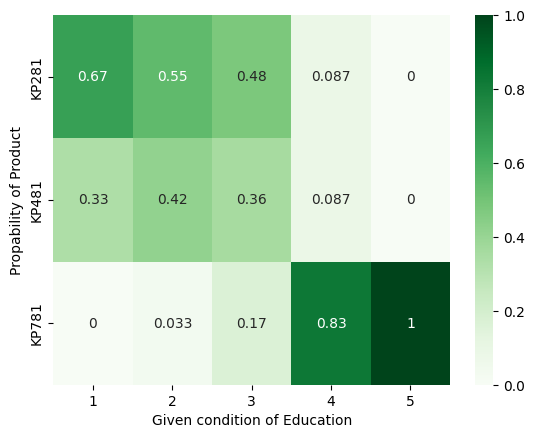


----------------------------------------------------------------------------------------------------------
Unique Value Counts of MaritalStatus Feature
*************************************************
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64
*************************************************
Marginal Propabilities of each value in MaritalStatus Feature
*************************************************
P( Partnered ) = 0.59
P( Single ) = 0.41
*************************************************
2-Way Contigency Table for Features : Product & MaritalStatus
*************************************************
MaritalStatus  Partnered  Single  All
Product                              
KP281                 48      32   80
KP481                 36      24   60
KP781                 23      17   40
All                  107      73  180
*************************************************
Index Wise Nornmalized 2-Way Contigency Table for Features : Product & MaritalStatus
*

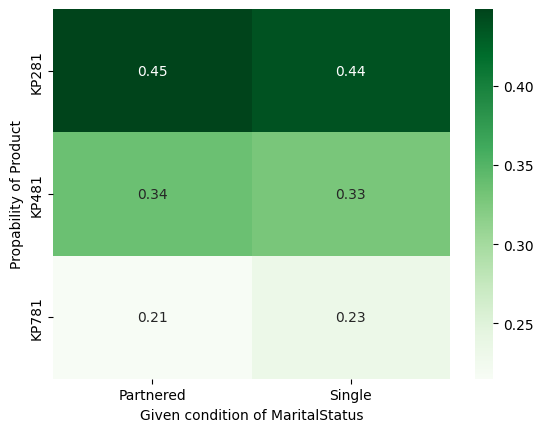


----------------------------------------------------------------------------------------------------------
Unique Value Counts of Usage Feature
*************************************************
3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64
*************************************************
Marginal Propabilities of each value in Usage Feature
*************************************************
P( 3 ) = 0.38
P( 4 ) = 0.29
P( 2 ) = 0.18
P( 5 ) = 0.09
P( 6 ) = 0.04
P( 7 ) = 0.01
*************************************************
2-Way Contigency Table for Features : Product & Usage
*************************************************
Usage     2   3   4   5  6  7  All
Product                           
KP281    19  37  22   2  0  0   80
KP481    14  31  12   3  0  0   60
KP781     0   1  18  12  7  2   40
All      33  69  52  17  7  2  180
*************************************************
Index Wise Nornmalized 2-Way Contigency Table for Features : Product & Usage
**

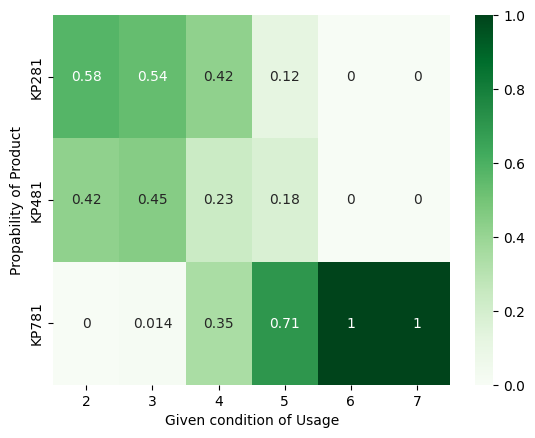


----------------------------------------------------------------------------------------------------------
Unique Value Counts of Fitness Feature
*************************************************
3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64
*************************************************
Marginal Propabilities of each value in Fitness Feature
*************************************************
P( 3 ) = 0.54
P( 5 ) = 0.17
P( 2 ) = 0.14
P( 4 ) = 0.13
P( 1 ) = 0.01
*************************************************
2-Way Contigency Table for Features : Product & Fitness
*************************************************
Fitness  1   2   3   4   5  All
Product                        
KP281    1  14  54   9   2   80
KP481    1  12  39   8   0   60
KP781    0   0   4   7  29   40
All      2  26  97  24  31  180
*************************************************
Index Wise Nornmalized 2-Way Contigency Table for Features : Product & Fitness
********************************

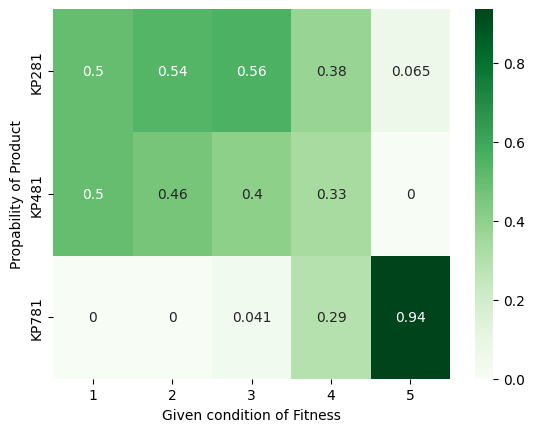


----------------------------------------------------------------------------------------------------------
Unique Value Counts of Income Feature
*************************************************
Medium       108
Low           49
Very High     12
High          11
Name: Income, dtype: int64
*************************************************
Marginal Propabilities of each value in Income Feature
*************************************************
P( Medium ) = 0.6
P( Low ) = 0.27
P( Very High ) = 0.07
P( High ) = 0.06
*************************************************
2-Way Contigency Table for Features : Product & Income
*************************************************
Income   Low  Medium  High  Very High  All
Product                                   
KP281     34      46     0          0   80
KP481     15      45     0          0   60
KP781      0      17    11         12   40
All       49     108    11         12  180
*************************************************
Index Wise Nornmal

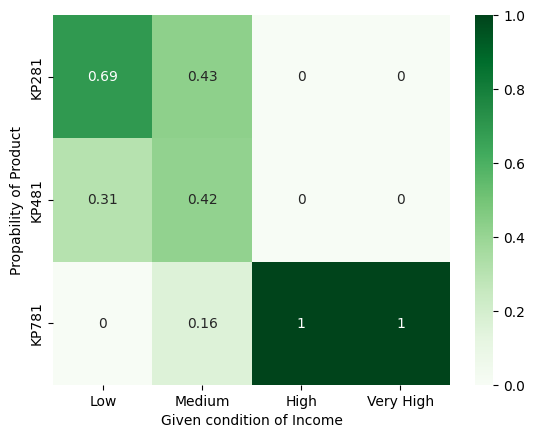


----------------------------------------------------------------------------------------------------------
Unique Value Counts of Miles Feature
*************************************************
Medium       93
low          59
High         23
Very High     5
Name: Miles, dtype: int64
*************************************************
Marginal Propabilities of each value in Miles Feature
*************************************************
P( Medium ) = 0.52
P( low ) = 0.33
P( High ) = 0.13
P( Very High ) = 0.03
*************************************************
2-Way Contigency Table for Features : Product & Miles
*************************************************
Miles    low  Medium  High  Very High  All
Product                                   
KP281     38      40     2          0   80
KP481     21      36     3          0   60
KP781      0      17    18          5   40
All       59      93    23          5  180
*************************************************
Index Wise Nornmalized 2-

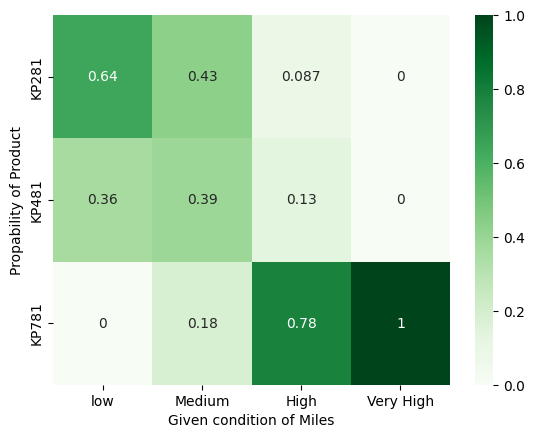


----------------------------------------------------------------------------------------------------------


In [ ]:
print("****Calculating all Marginal & Conditional propobilities with Heatmaps ****")
print()
print("*************************************************")
for k in dataC.columns:
  print("Unique Value Counts of",k,"Feature")
  print("*************************************************")
  C = dataC[k].value_counts()
  print(C)
  print("*************************************************")
  print("Marginal Propabilities of each value in",k,"Feature")
  print("*************************************************")
  for j in C.index:
    print("P(",j,") =",round(C[j]/180, 2) )
  print("*************************************************")
  if k != "Product":
    print("2-Way Contigency Table for Features : Product &", k)
    print("*************************************************")
    D = pd.crosstab(dataC["Product"],dataC[k],margins = True)
    DNC = pd.crosstab(dataC["Product"],dataC[k],normalize ="columns" )
    DNR = pd.crosstab(dataC["Product"],dataC[k],normalize ="index" )
    print(D)
    print("*************************************************")
    print("Index Wise Nornmalized 2-Way Contigency Table for Features : Product &", k)
    print("*************************************************")
    print(DNR)
    print("*************************************************")
    print("Column Wise Nornmalized 2-Way Contigency Table for Features : Product &", k)
    print("*************************************************")
    print(DNC)
    print("*************************************************")
    print("Conditional propability of each Product given condition of",k)
    print("*************************************************")
    for i in D.index[-2::-1][::-1]:
      for j in D.columns[-2::-1][::-1]:
        print("P(",i,"|",j,") =",round(D.loc[i][j]/D.loc["All"][j],2))
    print("***********************************************")
    print("Conditional propability Heatmap of each Product given condition of",k)
    print("*************************************************")
    sns.heatmap(data=DNC,annot=True,cmap = "Greens")
    plt.ylabel("Propability of Product")
    plt.xlabel("Given condition of "+k)
    plt.show()
    print()
    print("----------------------------------------------------------------------------------------------------------")
  else:
    print()
    print("----------------------------------------------------------------------------------------------------------")

# **2 Way Contigency table with 3 Features - (Product,Feature1) & Feature2**

Genrating all possible 2 Way Contigency table with 3 Features - (Product,Feature1) & Feature2 
**********************************************************************************************
-------------------------------------------------------------------
Contigency table for [ Product, Age ] & Gender
-------------------------------------------------------------------


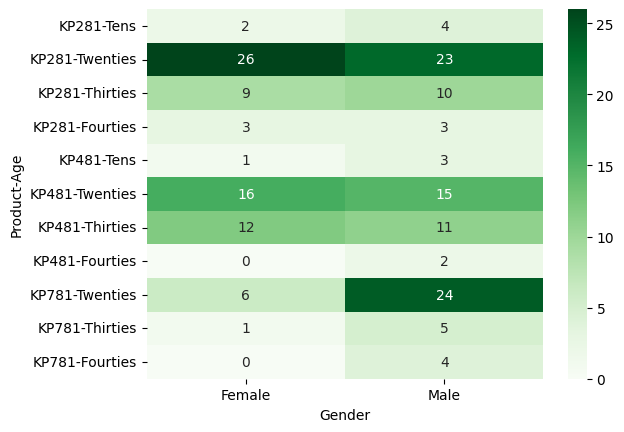

-------------------------------------------------------------------
Contigency table for [ Product, Age ] & Education
-------------------------------------------------------------------


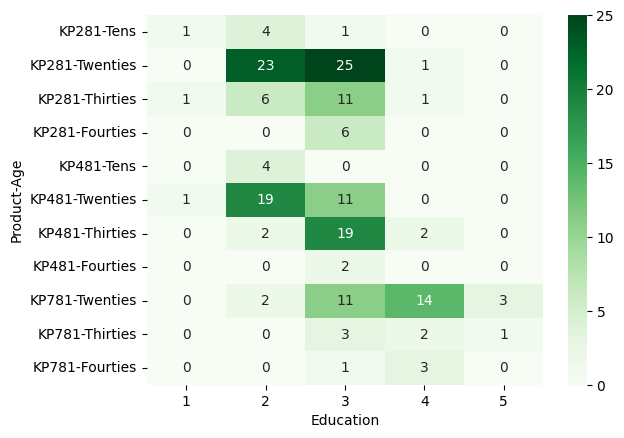

-------------------------------------------------------------------
Contigency table for [ Product, Age ] & MaritalStatus
-------------------------------------------------------------------


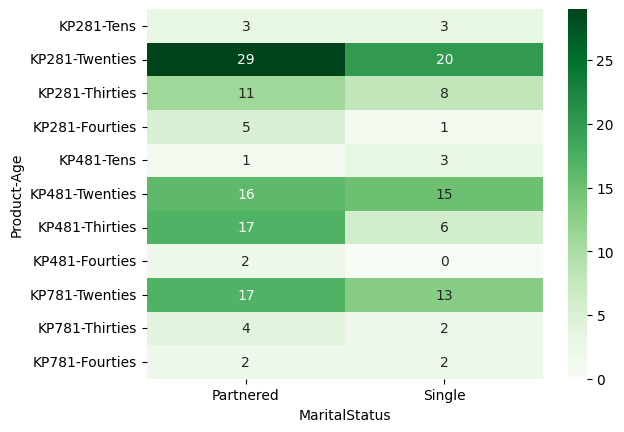

-------------------------------------------------------------------
Contigency table for [ Product, Age ] & Usage
-------------------------------------------------------------------


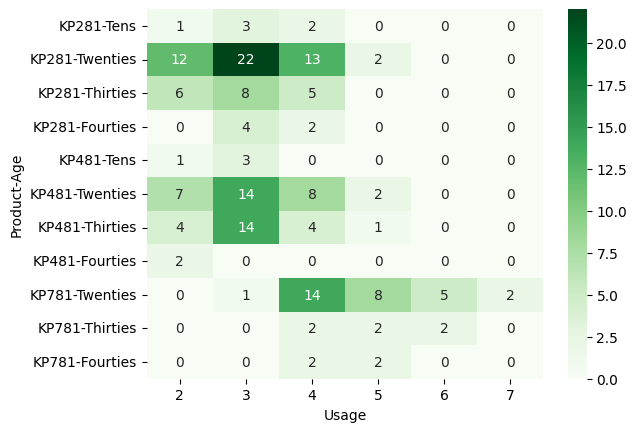

-------------------------------------------------------------------
Contigency table for [ Product, Age ] & Fitness
-------------------------------------------------------------------


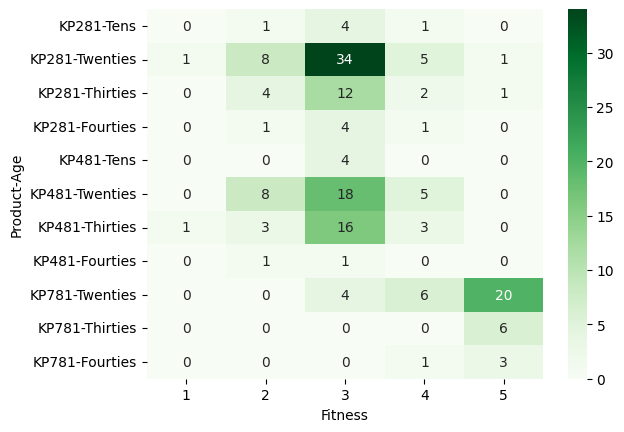

-------------------------------------------------------------------
Contigency table for [ Product, Age ] & Income
-------------------------------------------------------------------


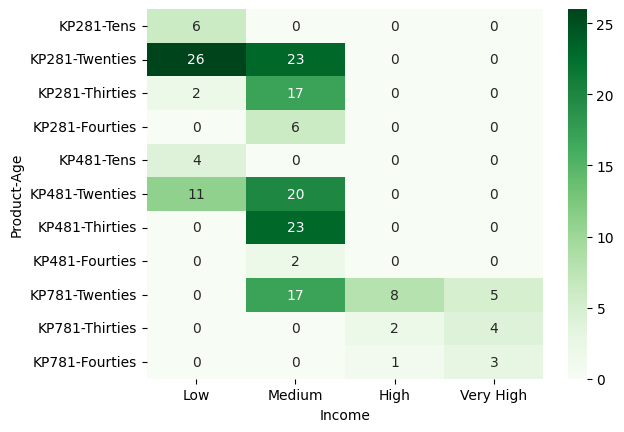

-------------------------------------------------------------------
Contigency table for [ Product, Age ] & Miles
-------------------------------------------------------------------


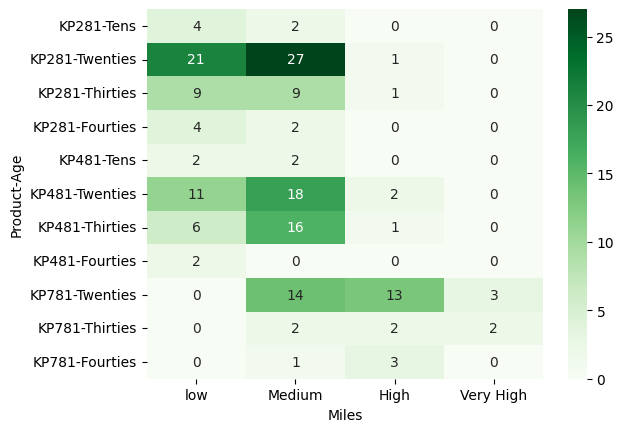

******************************************************************************************
-------------------------------------------------------------------
Contigency table for [ Product, Gender ] & Age
-------------------------------------------------------------------


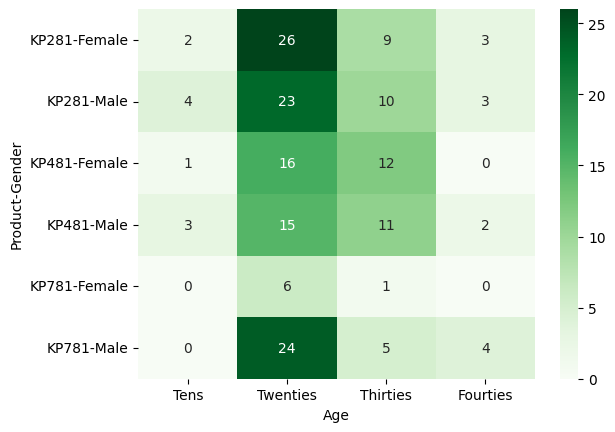

-------------------------------------------------------------------
Contigency table for [ Product, Gender ] & Education
-------------------------------------------------------------------


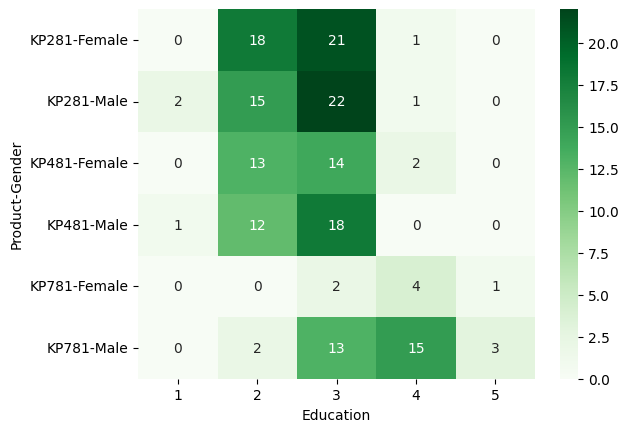

-------------------------------------------------------------------
Contigency table for [ Product, Gender ] & MaritalStatus
-------------------------------------------------------------------


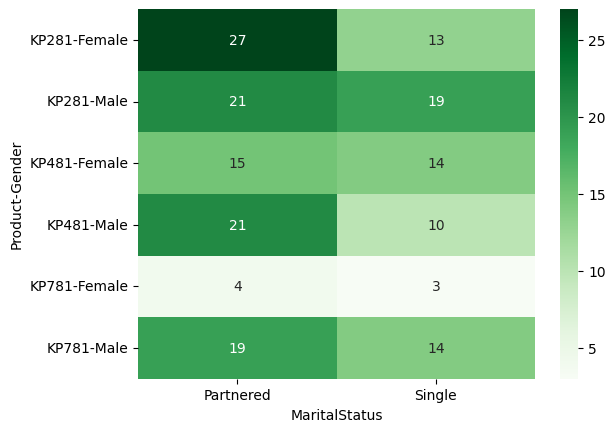

-------------------------------------------------------------------
Contigency table for [ Product, Gender ] & Usage
-------------------------------------------------------------------


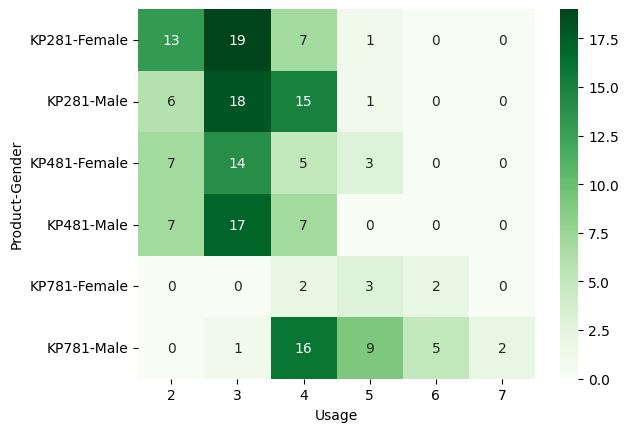

-------------------------------------------------------------------
Contigency table for [ Product, Gender ] & Fitness
-------------------------------------------------------------------


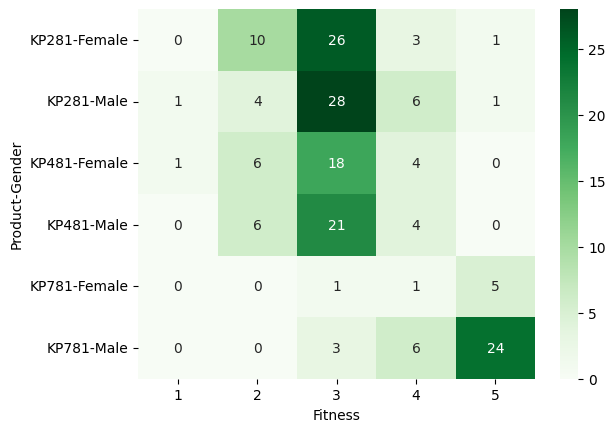

-------------------------------------------------------------------
Contigency table for [ Product, Gender ] & Income
-------------------------------------------------------------------


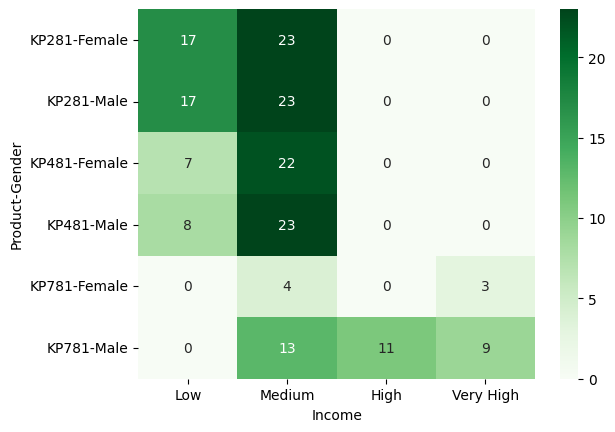

-------------------------------------------------------------------
Contigency table for [ Product, Gender ] & Miles
-------------------------------------------------------------------


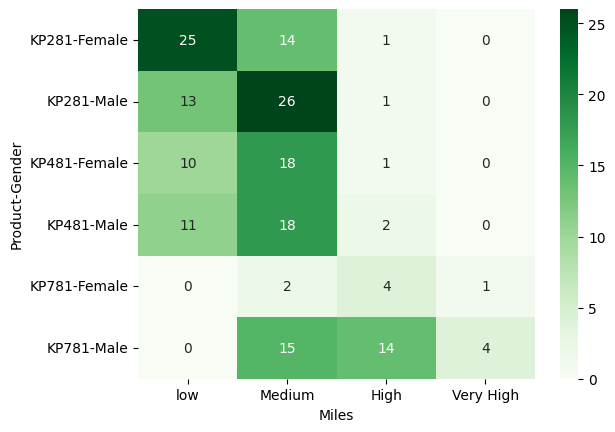

******************************************************************************************
-------------------------------------------------------------------
Contigency table for [ Product, Education ] & Age
-------------------------------------------------------------------


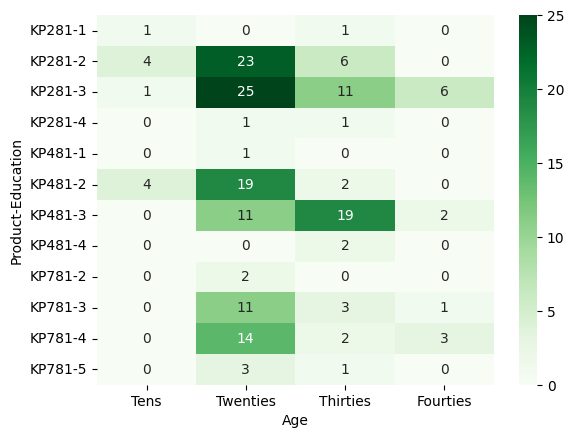

-------------------------------------------------------------------
Contigency table for [ Product, Education ] & Gender
-------------------------------------------------------------------


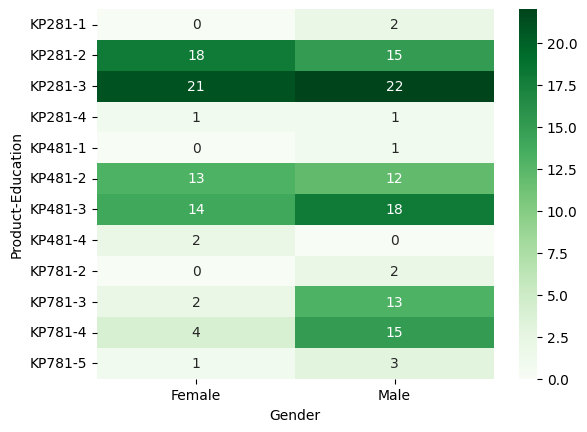

-------------------------------------------------------------------
Contigency table for [ Product, Education ] & MaritalStatus
-------------------------------------------------------------------


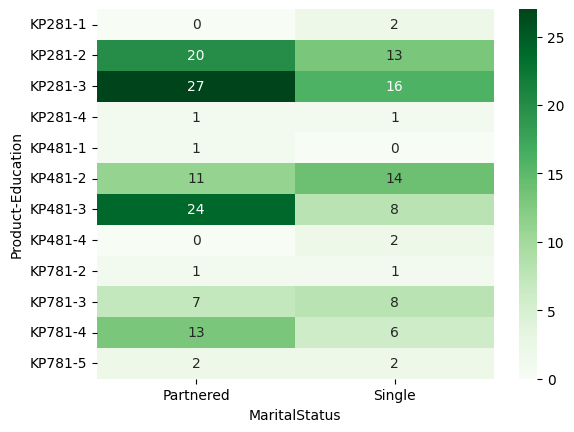

-------------------------------------------------------------------
Contigency table for [ Product, Education ] & Usage
-------------------------------------------------------------------


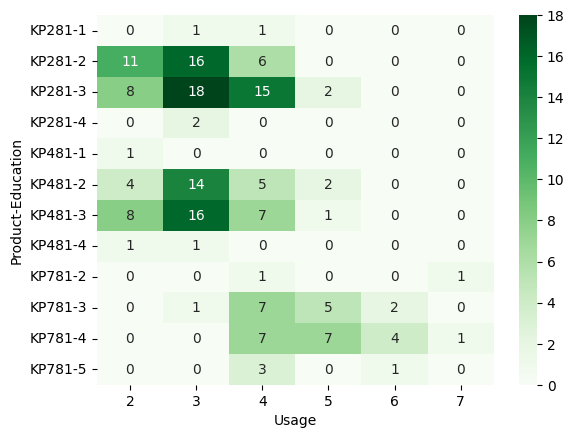

-------------------------------------------------------------------
Contigency table for [ Product, Education ] & Fitness
-------------------------------------------------------------------


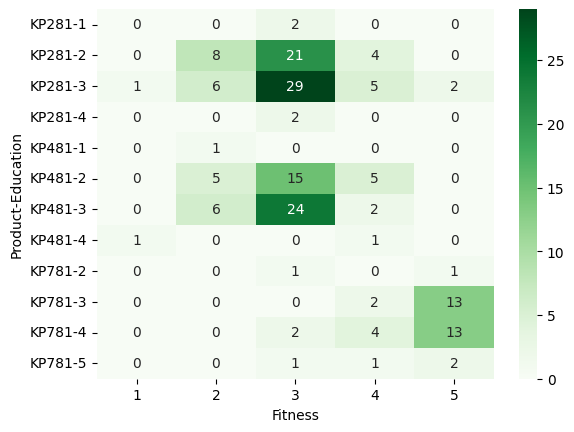

-------------------------------------------------------------------
Contigency table for [ Product, Education ] & Income
-------------------------------------------------------------------


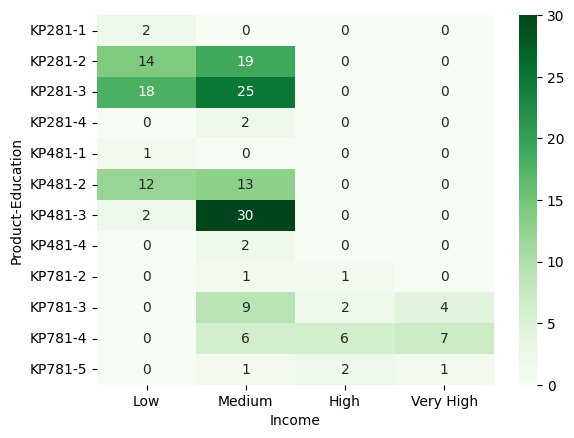

-------------------------------------------------------------------
Contigency table for [ Product, Education ] & Miles
-------------------------------------------------------------------


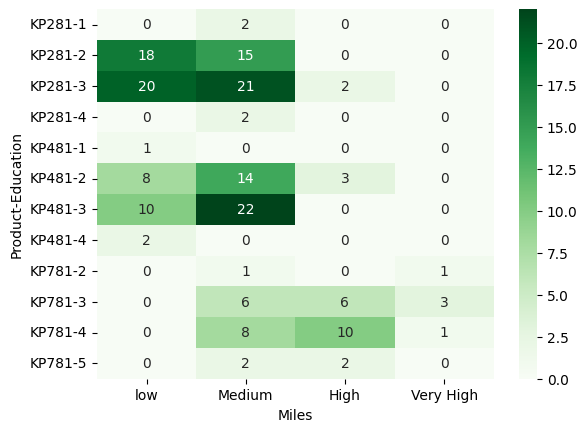

******************************************************************************************
-------------------------------------------------------------------
Contigency table for [ Product, MaritalStatus ] & Age
-------------------------------------------------------------------


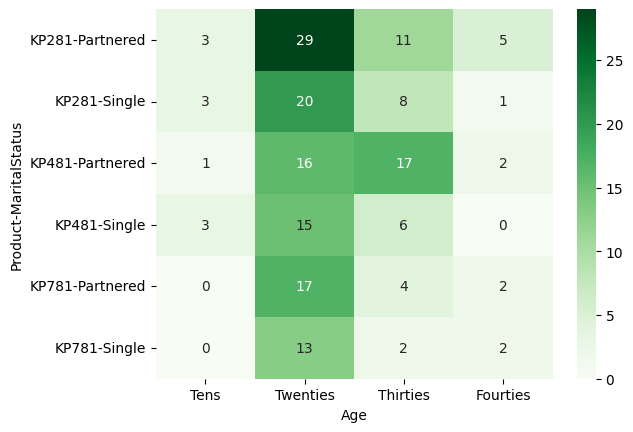

-------------------------------------------------------------------
Contigency table for [ Product, MaritalStatus ] & Gender
-------------------------------------------------------------------


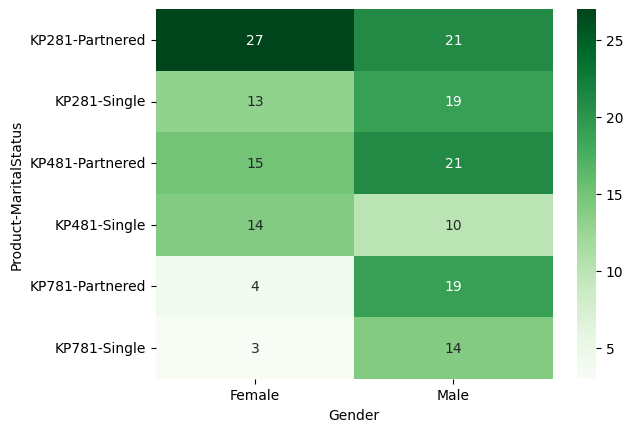

-------------------------------------------------------------------
Contigency table for [ Product, MaritalStatus ] & Education
-------------------------------------------------------------------


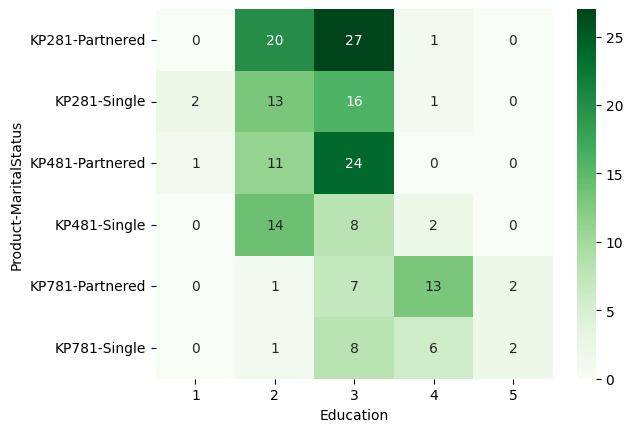

-------------------------------------------------------------------
Contigency table for [ Product, MaritalStatus ] & Usage
-------------------------------------------------------------------


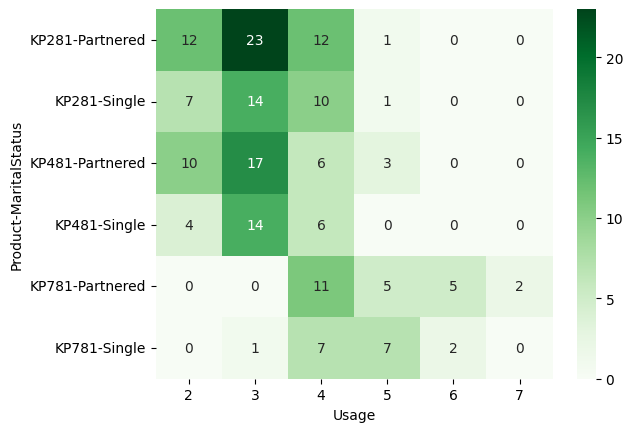

-------------------------------------------------------------------
Contigency table for [ Product, MaritalStatus ] & Fitness
-------------------------------------------------------------------


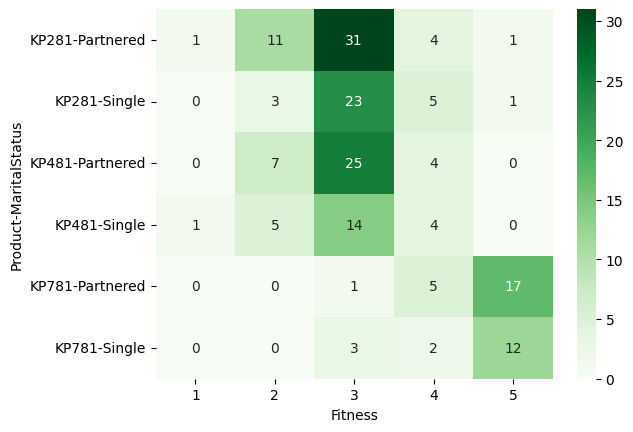

-------------------------------------------------------------------
Contigency table for [ Product, MaritalStatus ] & Income
-------------------------------------------------------------------


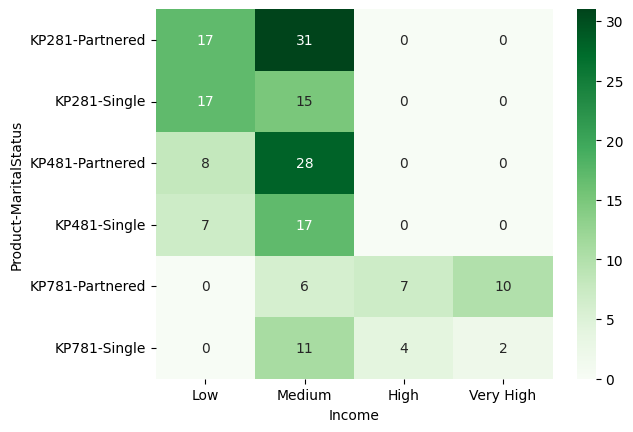

-------------------------------------------------------------------
Contigency table for [ Product, MaritalStatus ] & Miles
-------------------------------------------------------------------


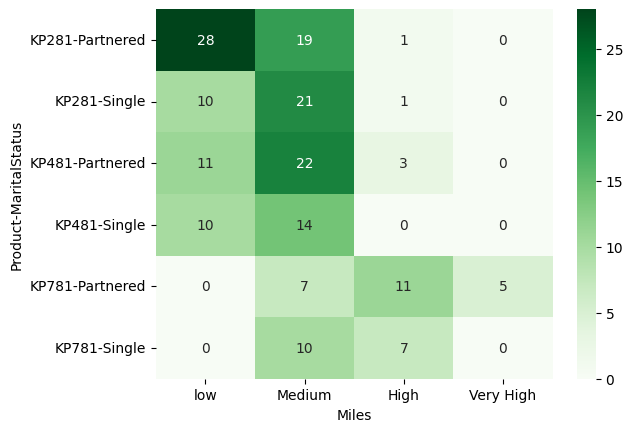

******************************************************************************************
-------------------------------------------------------------------
Contigency table for [ Product, Usage ] & Age
-------------------------------------------------------------------


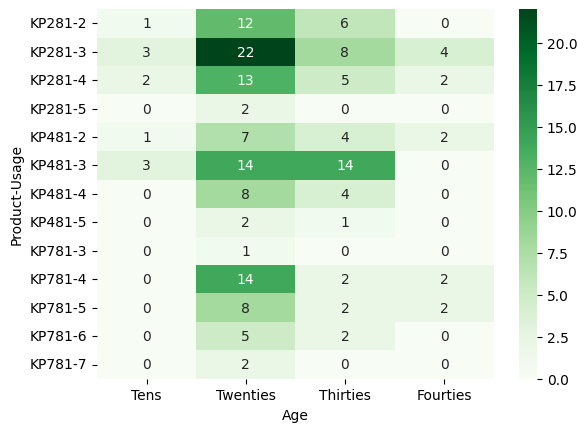

-------------------------------------------------------------------
Contigency table for [ Product, Usage ] & Gender
-------------------------------------------------------------------


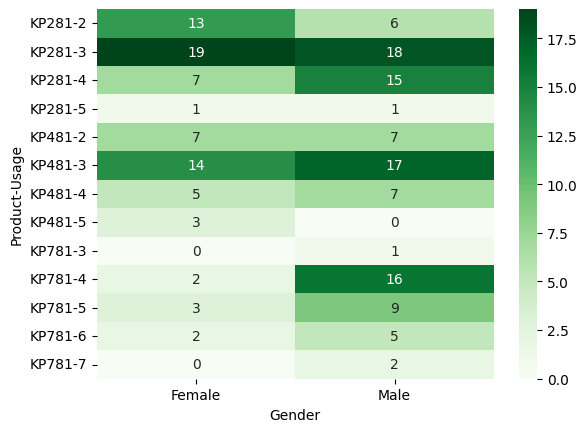

-------------------------------------------------------------------
Contigency table for [ Product, Usage ] & Education
-------------------------------------------------------------------


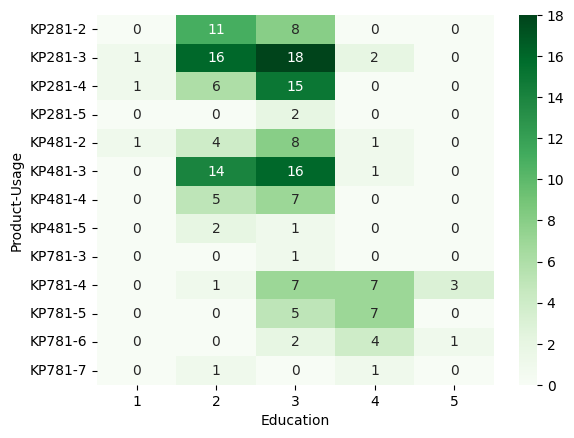

-------------------------------------------------------------------
Contigency table for [ Product, Usage ] & MaritalStatus
-------------------------------------------------------------------


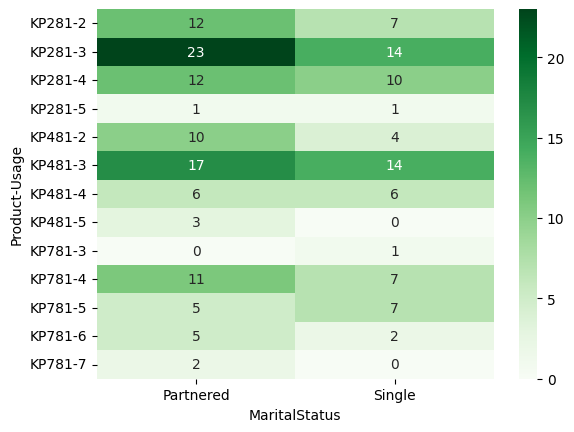

-------------------------------------------------------------------
Contigency table for [ Product, Usage ] & Fitness
-------------------------------------------------------------------


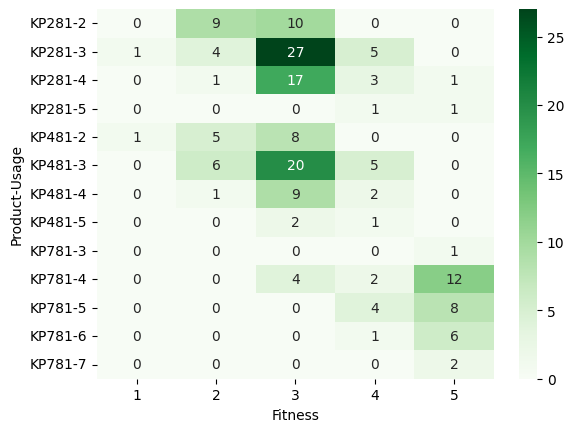

-------------------------------------------------------------------
Contigency table for [ Product, Usage ] & Income
-------------------------------------------------------------------


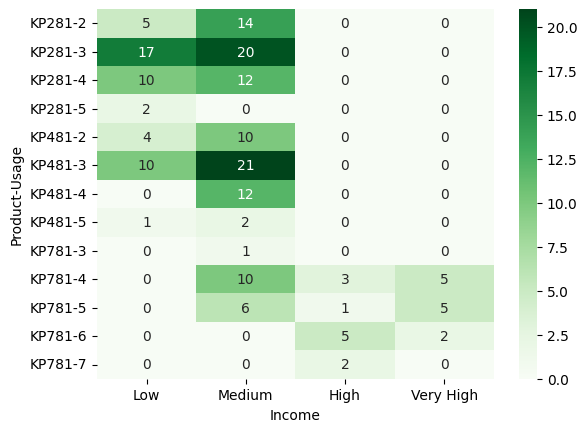

-------------------------------------------------------------------
Contigency table for [ Product, Usage ] & Miles
-------------------------------------------------------------------


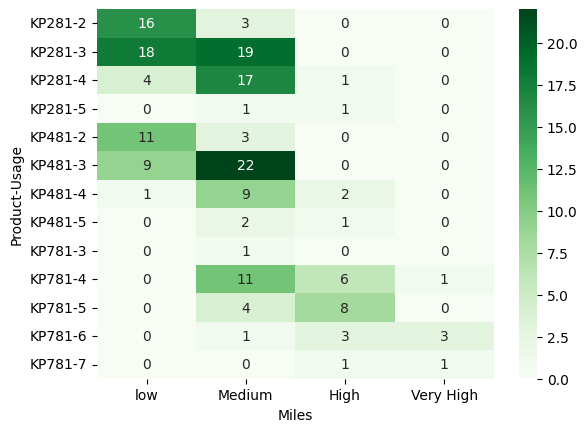

******************************************************************************************
-------------------------------------------------------------------
Contigency table for [ Product, Fitness ] & Age
-------------------------------------------------------------------


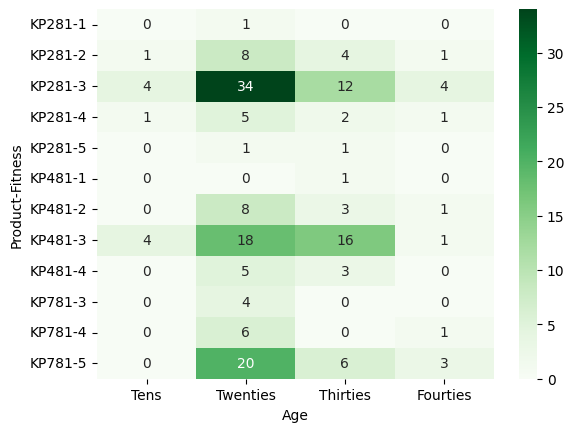

-------------------------------------------------------------------
Contigency table for [ Product, Fitness ] & Gender
-------------------------------------------------------------------


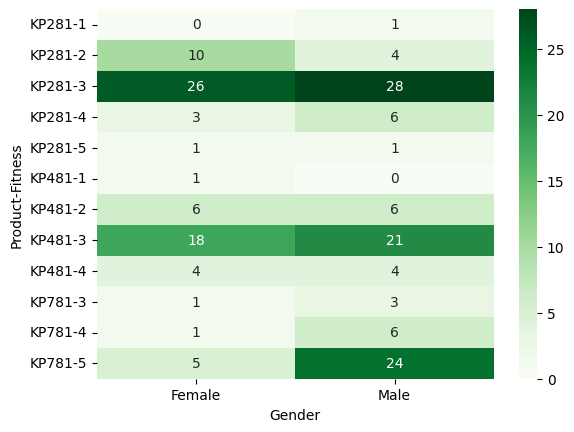

-------------------------------------------------------------------
Contigency table for [ Product, Fitness ] & Education
-------------------------------------------------------------------


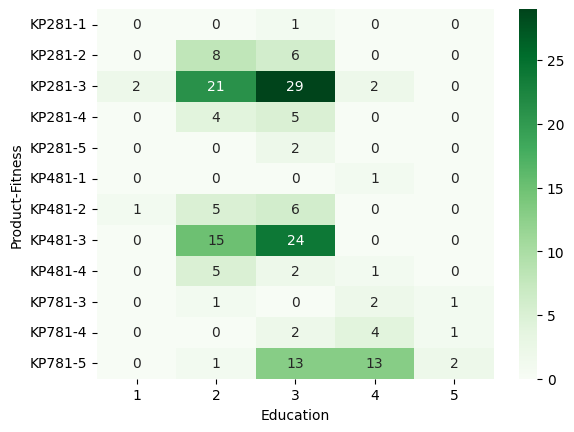

-------------------------------------------------------------------
Contigency table for [ Product, Fitness ] & MaritalStatus
-------------------------------------------------------------------


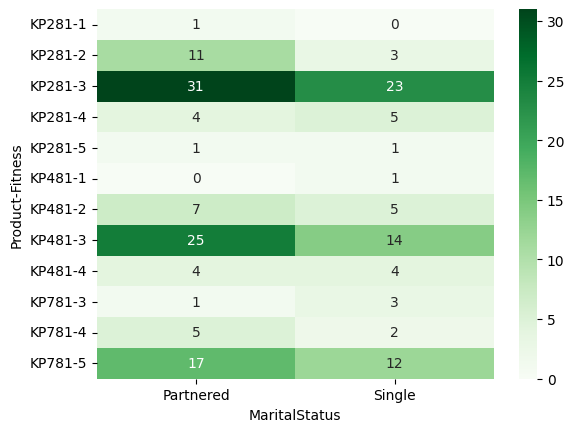

-------------------------------------------------------------------
Contigency table for [ Product, Fitness ] & Usage
-------------------------------------------------------------------


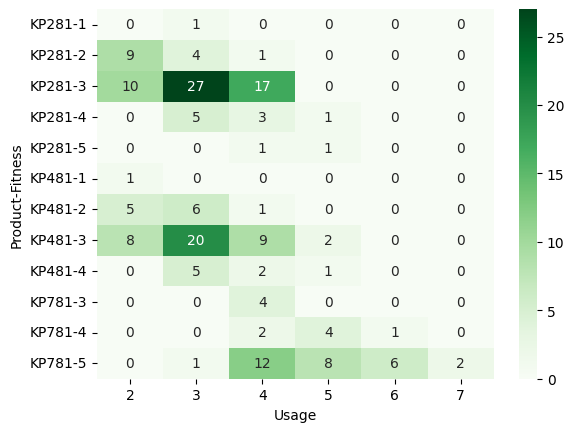

-------------------------------------------------------------------
Contigency table for [ Product, Fitness ] & Income
-------------------------------------------------------------------


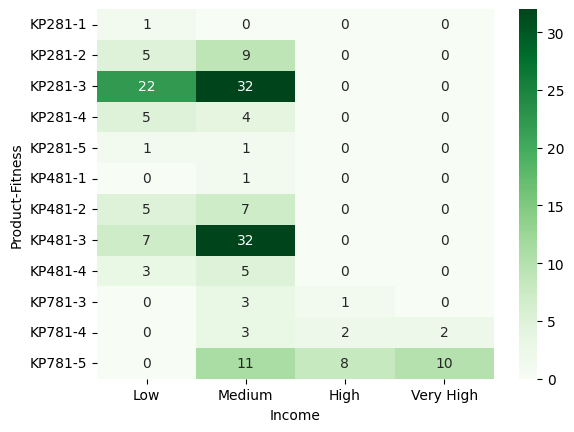

-------------------------------------------------------------------
Contigency table for [ Product, Fitness ] & Miles
-------------------------------------------------------------------


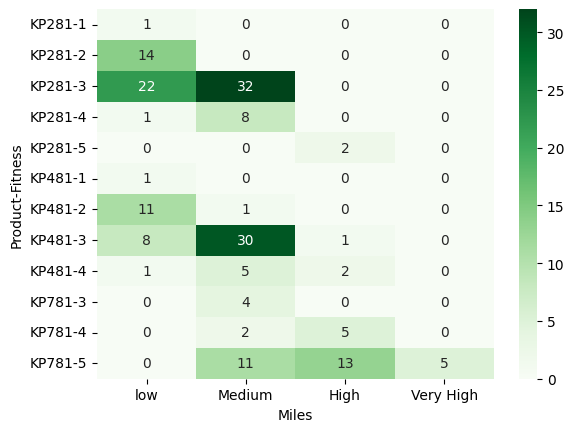

******************************************************************************************
-------------------------------------------------------------------
Contigency table for [ Product, Income ] & Age
-------------------------------------------------------------------


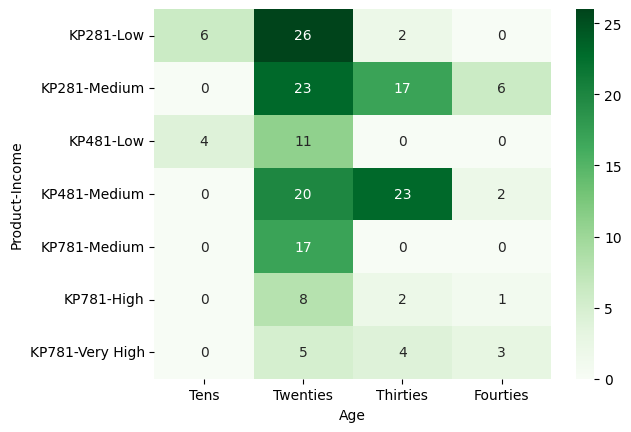

-------------------------------------------------------------------
Contigency table for [ Product, Income ] & Gender
-------------------------------------------------------------------


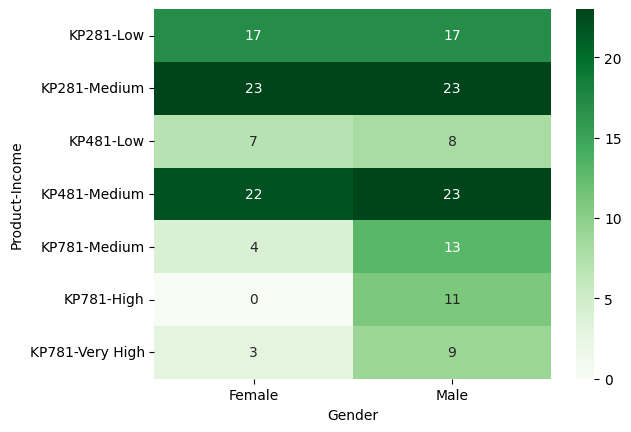

-------------------------------------------------------------------
Contigency table for [ Product, Income ] & Education
-------------------------------------------------------------------


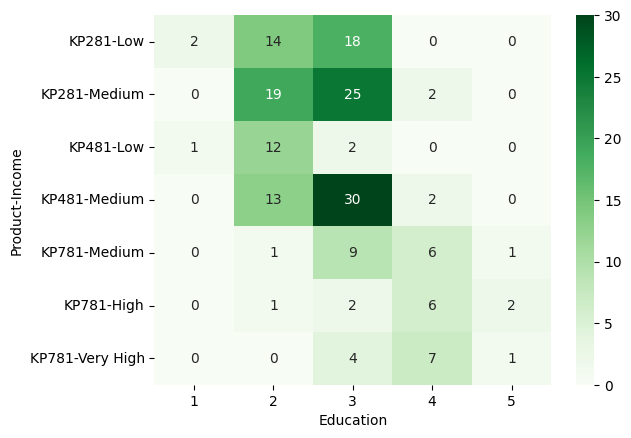

-------------------------------------------------------------------
Contigency table for [ Product, Income ] & MaritalStatus
-------------------------------------------------------------------


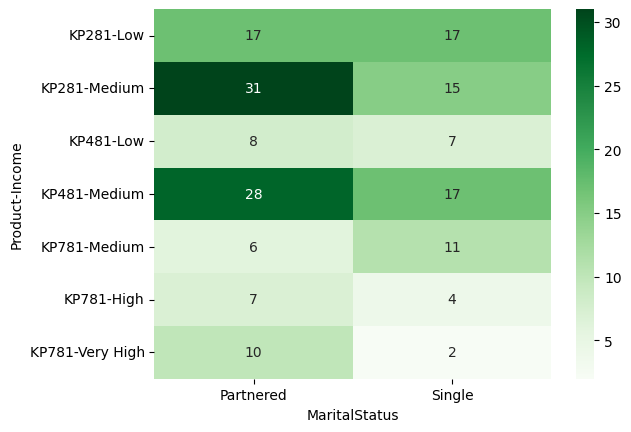

-------------------------------------------------------------------
Contigency table for [ Product, Income ] & Usage
-------------------------------------------------------------------


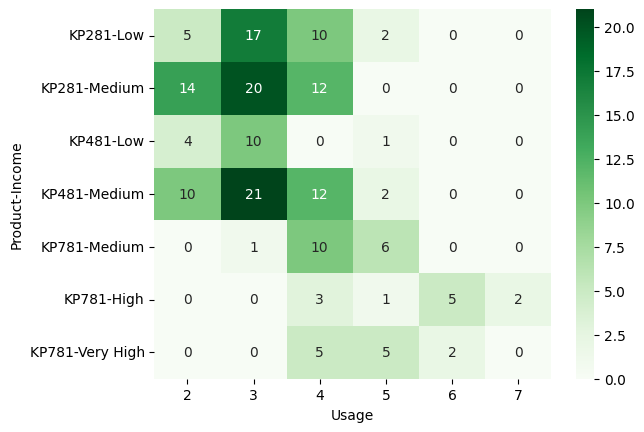

-------------------------------------------------------------------
Contigency table for [ Product, Income ] & Fitness
-------------------------------------------------------------------


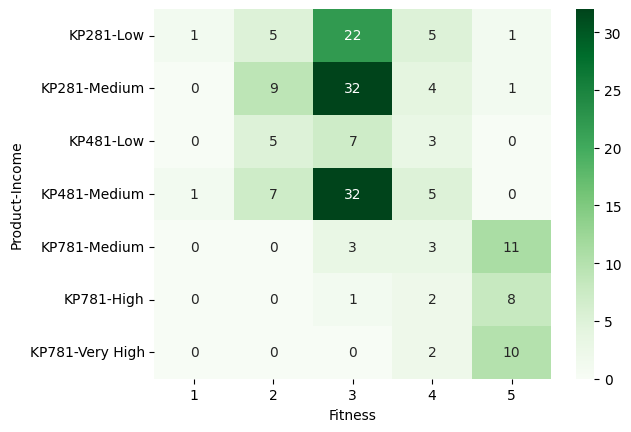

-------------------------------------------------------------------
Contigency table for [ Product, Income ] & Miles
-------------------------------------------------------------------


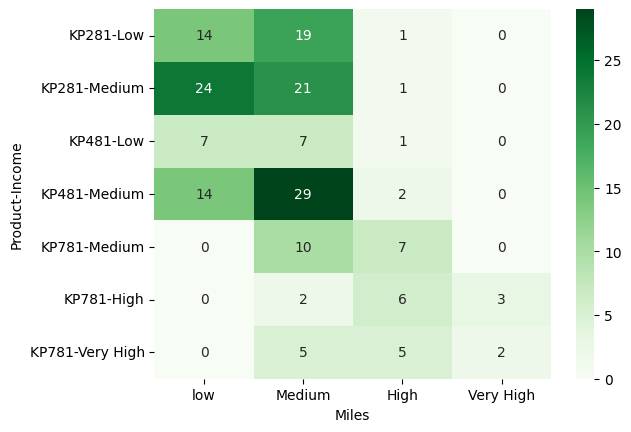

******************************************************************************************
-------------------------------------------------------------------
Contigency table for [ Product, Miles ] & Age
-------------------------------------------------------------------


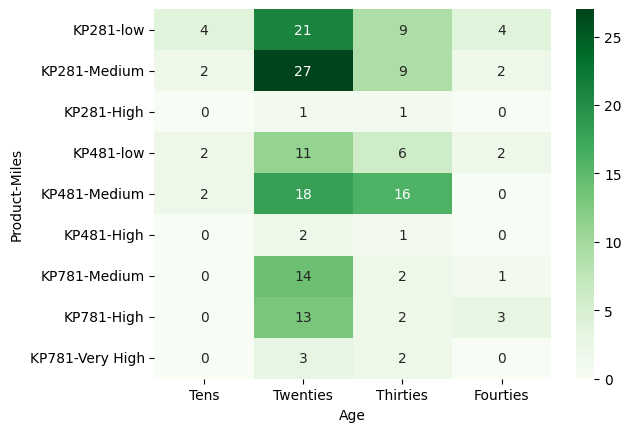

-------------------------------------------------------------------
Contigency table for [ Product, Miles ] & Gender
-------------------------------------------------------------------


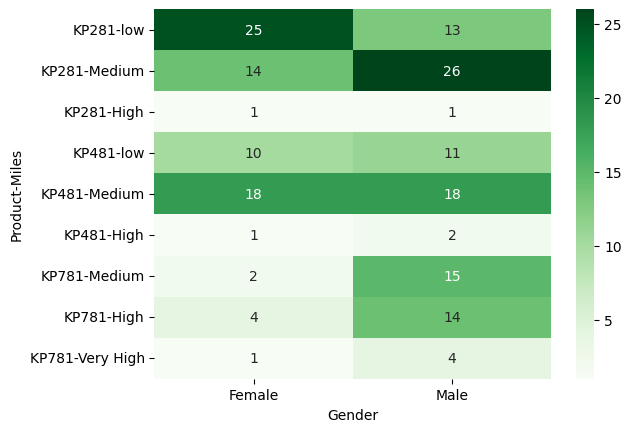

-------------------------------------------------------------------
Contigency table for [ Product, Miles ] & Education
-------------------------------------------------------------------


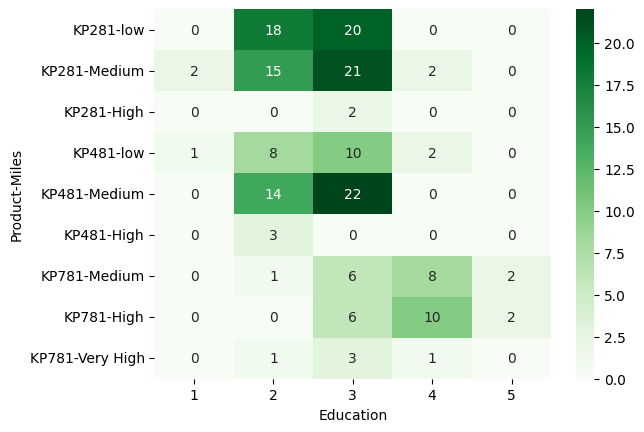

-------------------------------------------------------------------
Contigency table for [ Product, Miles ] & MaritalStatus
-------------------------------------------------------------------


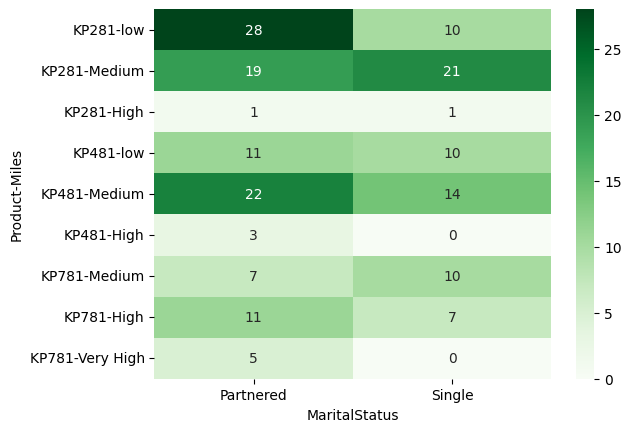

-------------------------------------------------------------------
Contigency table for [ Product, Miles ] & Usage
-------------------------------------------------------------------


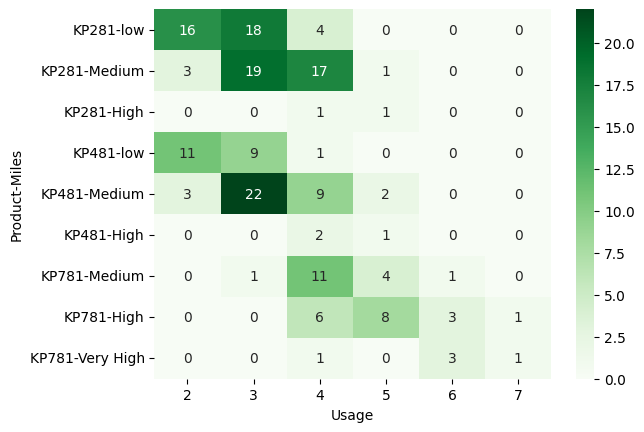

-------------------------------------------------------------------
Contigency table for [ Product, Miles ] & Fitness
-------------------------------------------------------------------


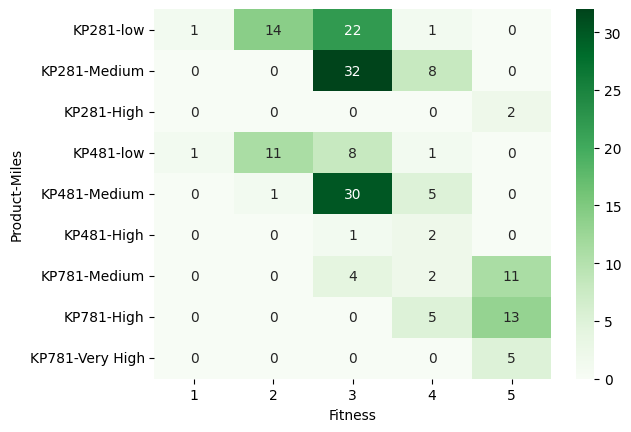

-------------------------------------------------------------------
Contigency table for [ Product, Miles ] & Income
-------------------------------------------------------------------


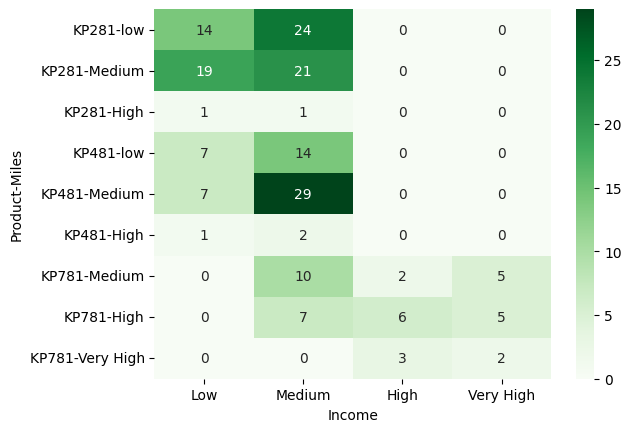

******************************************************************************************


In [ ]:
print("Genrating all possible 2 Way Contigency table with 3 Features - (Product,Feature1) & Feature2 ")
print("**********************************************************************************************")

for k in dataC.columns:
  if k != "Product":
    for l in dataC.columns:
      if l != k and l != "Product":
        EN = pd.crosstab([dataC["Product"],dataC[k]],dataC[l])
        print("-------------------------------------------------------------------")
        print("Contigency table for [ Product,",k,"] &", l )
        print("-------------------------------------------------------------------")
        sns.heatmap(data=EN,annot=True,cmap = "Greens")
        plt.show()
        #print(EN)
    print("******************************************************************************************")

# **Bussiness Insights**

* Most Selling Aerofit Product is KP281

* Higher the Fitness Rating --> Higher the Usage also Higher Miles in a week
* Higher the Education --> Higher the Annual Income
* On an average people with higher income are having higher usage

* Aerofit has more Male Customers than Females
* Aerofit Majority customer with Education of 15~16 Years
* Aerofit has major Customers in  age of 20~30 Years
* Marital status has very minimal effect on choosing product, however Parterned people prefer Aerofit more than Singles
* Majority of Customer rate theit fitness as "3"
* Majority of Customer income lies in the range 45000 ~ 70000$
* Majority of Customer miles lies in the range 75 ~ 150 Miles/Week

* Product KP481 is well Placed between KP281 & KP781, people with little more income & usage go for KP481



**Customer Portifolio for KP281:**
* 44% Customers Preffered KP281
* KP281 Customes having income less than 70000
* Majarity of kp281 Customer are in 20's and next in 30's, however KP281 product has customers in all ages
* Maximum miles in a week for KP281 customer is < 150 Miles
* Education Year of KP281 Customers < = 16 and major customer are of 16 & 14 year education
* Male & Female eqaully prefer KP281
* KP281 Customer ussage per week <=4
* KP281 Customer Rate their fitness <=3
* Marital Status has no impact on selection of Product

**Customer Portifolio for KP481:**

* 33% Customers prefered KP481
* KP481 Customes having income less than 70000 ,however 75% of them lie between 45000 ~ 70000$
* KP481 customers have age < 40,Also Customer in 30~40 mostly prefered KP481
* Maximum miles in a week for KP481 customer is < 150 Miles, Hoever 60% customers mile/week lie in range 75 ~ 150
* Education Year of KP481 Customers < = 16 and major customer are of 16 & 14 year education
* Male slightly more prefered KP481 than females
* KP481 Customer ussage per week <=5
* KP481 Customer Rate their fitness <=4
* Marital Status has no impact on selection of Product


**Customer Portifolio for KP781:**
* 22% Customers prefered KP781
* KP781 Customes having income >45000$  ,however 58% of them have income>150000$
* KP781 customers have age > 20, 75% Customer age is in range 20~30
* Miles in a week for KP781 customer is > 75 Miles, However 58% customers run > 150 miles
* Education Year of KP781 Customers >=14 and major customer are of 18 & then 16 year education
* Male[82%] highly prefered KP781 than females[18%]
* KP781 Customer ussage per week > =3 and 45% use it 4time , 30% use it for 5 times ans 18% use >=6 in a week
* KP781 Customer Rate their fitness >=3 and 72.5% customer rate themselves to be 5 rating fitness
* Marital Status has no impact on selection of Product

# **Recommendations**

* **New Product1** : KP781 is very less Preferred by Females... A new Product with little Less Specifications & Price than KP781 might Attract more Female Fittness Enthuasitists
* **New Product2:** Aerofit Has no Children Customer Base...A new Product with little e Less Specifications & Price than KP281 may cater for the needs of Children & novice Adults
* **New Product3** : Aerofit has very less customer base who has income > 70000$, a high luxurous product should be desinged to cater that customer base
* Aerofit has very less Customer base in 30~40 years Age..Newproduct1 can be designed keeping this customer base also as target in mind
* New Strategy to be prepared to attract more female Customers
* Aerofit has very less customer base with Education < 14 & >=21...New Strategy to be made to capture their market

